# Tugas Machine Learning
#### Nama  : Happid Ridwan Ilmi
#### Kelas : 14230010
#### Nim   : 14.B.01
[Link Google Collab](https://colab.research.google.com/drive/1aoFSWeBOg3E07FIiLe1LSqr5yXFfJrAl?usp=sharing)



# **1. Tulisan singkat terkait dataset yang dipilih**


**A).   Dari mana data diambil**

**Jawab:** Data diambil dari website https://archive.ics.uci.edu/dataset/320/student+performance . menurut penyedia repository pengambilan data siswa diambil pada pendidikan menengah di dua sekolah Portugis yaitu Gabriel Pereira dan Mousinho da Silva.  [Cortez dan Silva, 2008].

---
**B).   Bagaimana proses pengambilan datanya**

**Jawab:** Pengambilan data siswa pada pendidikan menengah di dua sekolah Portugis. dikumpulkan dengan menggunakan laporan sekolah dan kuesioner. Dua kumpulan data disediakan mengenai kinerja dalam dua mata pelajaran berbeda: Matematika (mat) dan bahasa Portugis (por). [Cortez dan Silva, 2008].
kedua kumpulan data dimodelkan dalam tugas klasifikasi dan regresi biner/lima tingkat.
pada website https://archive.ics.uci.edu/dataset/320/student+performance kita bisa mendownload data berbentuk zip, lalu meng ekstrak zip file yang sudah didownload. dan menggunakan file student-mat.csv dan student-por.csv

---
**C).   Berapa jumlah sample data**

**Jawab:** untuk data student-mat (395 data) dan student-pro (649 data)

---
**D).   Berapa jumlah fitur**

**Jawab:** untuk data student-mat (33 fitur) dan student-pro (33 fitur)
Beberapa fitur yang termasuk dalam dataset ini adalah:

---
**E).   Distribusi kelas (jika klasifikasi)**

**Jawab:**
Klasifikasi dilakukan dengan dua pendekatan:

Klasifikasi Biner: Dimana prestasi siswa dikategorikan sebagai "lulus" atau "tidak lulus". Biasanya, ini didasarkan pada nilai tertentu dari atribut target G3.
Klasifikasi Lima Tingkat: Ini melibatkan kategorisasi prestasi siswa ke dalam lima tingkat berdasarkan nilai mereka.

*   G1 - first period score (numeric: from 0 to 20)
*   G2 - second period score (numeric: from 0 to 20)
*   G3 - final score (numeric: from 0 to 20, output target)
*   Final Grade

```
# final_score>=15 AND final_score<=20. final grade = 'Good'
```
```
# final_score>=10 AND final_score<=14. final grade = 'Fair'
```
```
# final_score>=0 AND final_score<=9. final grade = 'Poor'
```

# **2. Explorasi dan visualisasi dataset dengan python**

### **A).   Tampilkan 10 data pertama**

In [ ]:
#import package and setting style

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm

sns.set_style('whitegrid')
plt.figure(figsize=(10,8))
sns.set(font_scale=1.5)

<Figure size 1000x800 with 0 Axes>

In [ ]:
# LOAD DATASET
student_mat = pd.read_csv("https://raw.githubusercontent.com/happidunm/Tugas_ML_01/main/student-mat.csv", sep=";")
student_por = pd.read_csv("https://raw.githubusercontent.com/happidunm/Tugas_ML_01/main/student-por.csv", sep=";")

student_mat['subject'] = 'mathematics'
student_por['subject'] = 'portuguese'

merge_dataset  = pd.concat([student_mat, student_por])

In [ ]:
# rename column labels
merge_dataset.columns = ['school','sex','age','address','family_size','parents_status','mother_education','father_education',
           'mother_job','father_job','reason','guardian','commute_time','study_time','failures','school_support',
          'family_support','paid_classes','activities','nursery','desire_higher_edu','internet','romantic','family_quality',
          'free_time','go_out','weekday_alcohol_usage','weekend_alcohol_usage','health','absences','period1_score','period2_score','final_score', 'subject']

# insert value final_grade with conditional
merge_dataset.loc[(merge_dataset.final_score >= 15) & (merge_dataset.final_score <= 20), 'final_grade'] = 'good'
merge_dataset.loc[(merge_dataset.final_score >= 10) & (merge_dataset.final_score <= 14), 'final_grade'] = 'fair'
merge_dataset.loc[(merge_dataset.final_score >= 0) & (merge_dataset.final_score <= 9), 'final_grade'] = 'poor'

# count
good = merge_dataset['final_grade'].value_counts()['good']
fair = merge_dataset['final_grade'].value_counts()['fair']
poor = merge_dataset['final_grade'].value_counts()['poor']

In [ ]:
# display first 10 data student-mat.csv
student_mat.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,subject
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,mathematics
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,mathematics
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,mathematics
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,mathematics
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,mathematics
5,GP,M,16,U,LE3,T,4,3,services,other,...,4,2,1,2,5,10,15,15,15,mathematics
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,1,1,3,0,12,12,11,mathematics
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,1,4,1,1,1,6,6,5,6,mathematics
8,GP,M,15,U,LE3,A,3,2,services,other,...,2,2,1,1,1,0,16,18,19,mathematics
9,GP,M,15,U,GT3,T,3,4,other,other,...,5,1,1,1,5,0,14,15,15,mathematics


In [ ]:
# display first 10 data student-por.csv
student_por.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,subject
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,4,0,11,11,portuguese
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,2,9,11,11,portuguese
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,6,12,13,12,portuguese
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,0,14,14,14,portuguese
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,0,11,13,13,portuguese
5,GP,M,16,U,LE3,T,4,3,services,other,...,4,2,1,2,5,6,12,12,13,portuguese
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,1,1,3,0,13,12,13,portuguese
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,1,4,1,1,1,2,10,13,13,portuguese
8,GP,M,15,U,LE3,A,3,2,services,other,...,2,2,1,1,1,0,15,16,17,portuguese
9,GP,M,15,U,GT3,T,3,4,other,other,...,5,1,1,1,5,0,12,12,13,portuguese


In [ ]:
# display first 10 data merge from student-mat.csv and student-por.csv
merge_dataset.head(10)

,school,sex,age,address,family_size,parents_status,mother_education,father_education,mother_job,father_job,...,go_out,weekday_alcohol_usage,weekend_alcohol_usage,health,absences,period1_score,period2_score,final_score,subject,final_grade
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,1,1,3,6,5,6,6,mathematics,poor
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,1,1,3,4,5,5,6,mathematics,poor
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,2,2,3,3,10,7,8,10,mathematics,fair
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,1,1,5,2,15,14,15,mathematics,good
4,GP,F,16,U,GT3,T,3,3,other,other,...,2,1,2,5,4,6,10,10,mathematics,fair
5,GP,M,16,U,LE3,T,4,3,services,other,...,2,1,2,5,10,15,15,15,mathematics,good
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,1,1,3,0,12,12,11,mathematics,fair
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,4,1,1,1,6,6,5,6,mathematics,poor
8,GP,M,15,U,LE3,A,3,2,services,other,...,2,1,1,1,0,16,18,19,mathematics,good
9,GP,M,15,U,GT3,T,3,4,other,other,...,1,1,1,5,0,14,15,15,mathematics,good


### **B).   Tampilkan statistik (Jumlah data setiap kelas) dari dataset tersebut dalam Bar atau Pie-Chart**

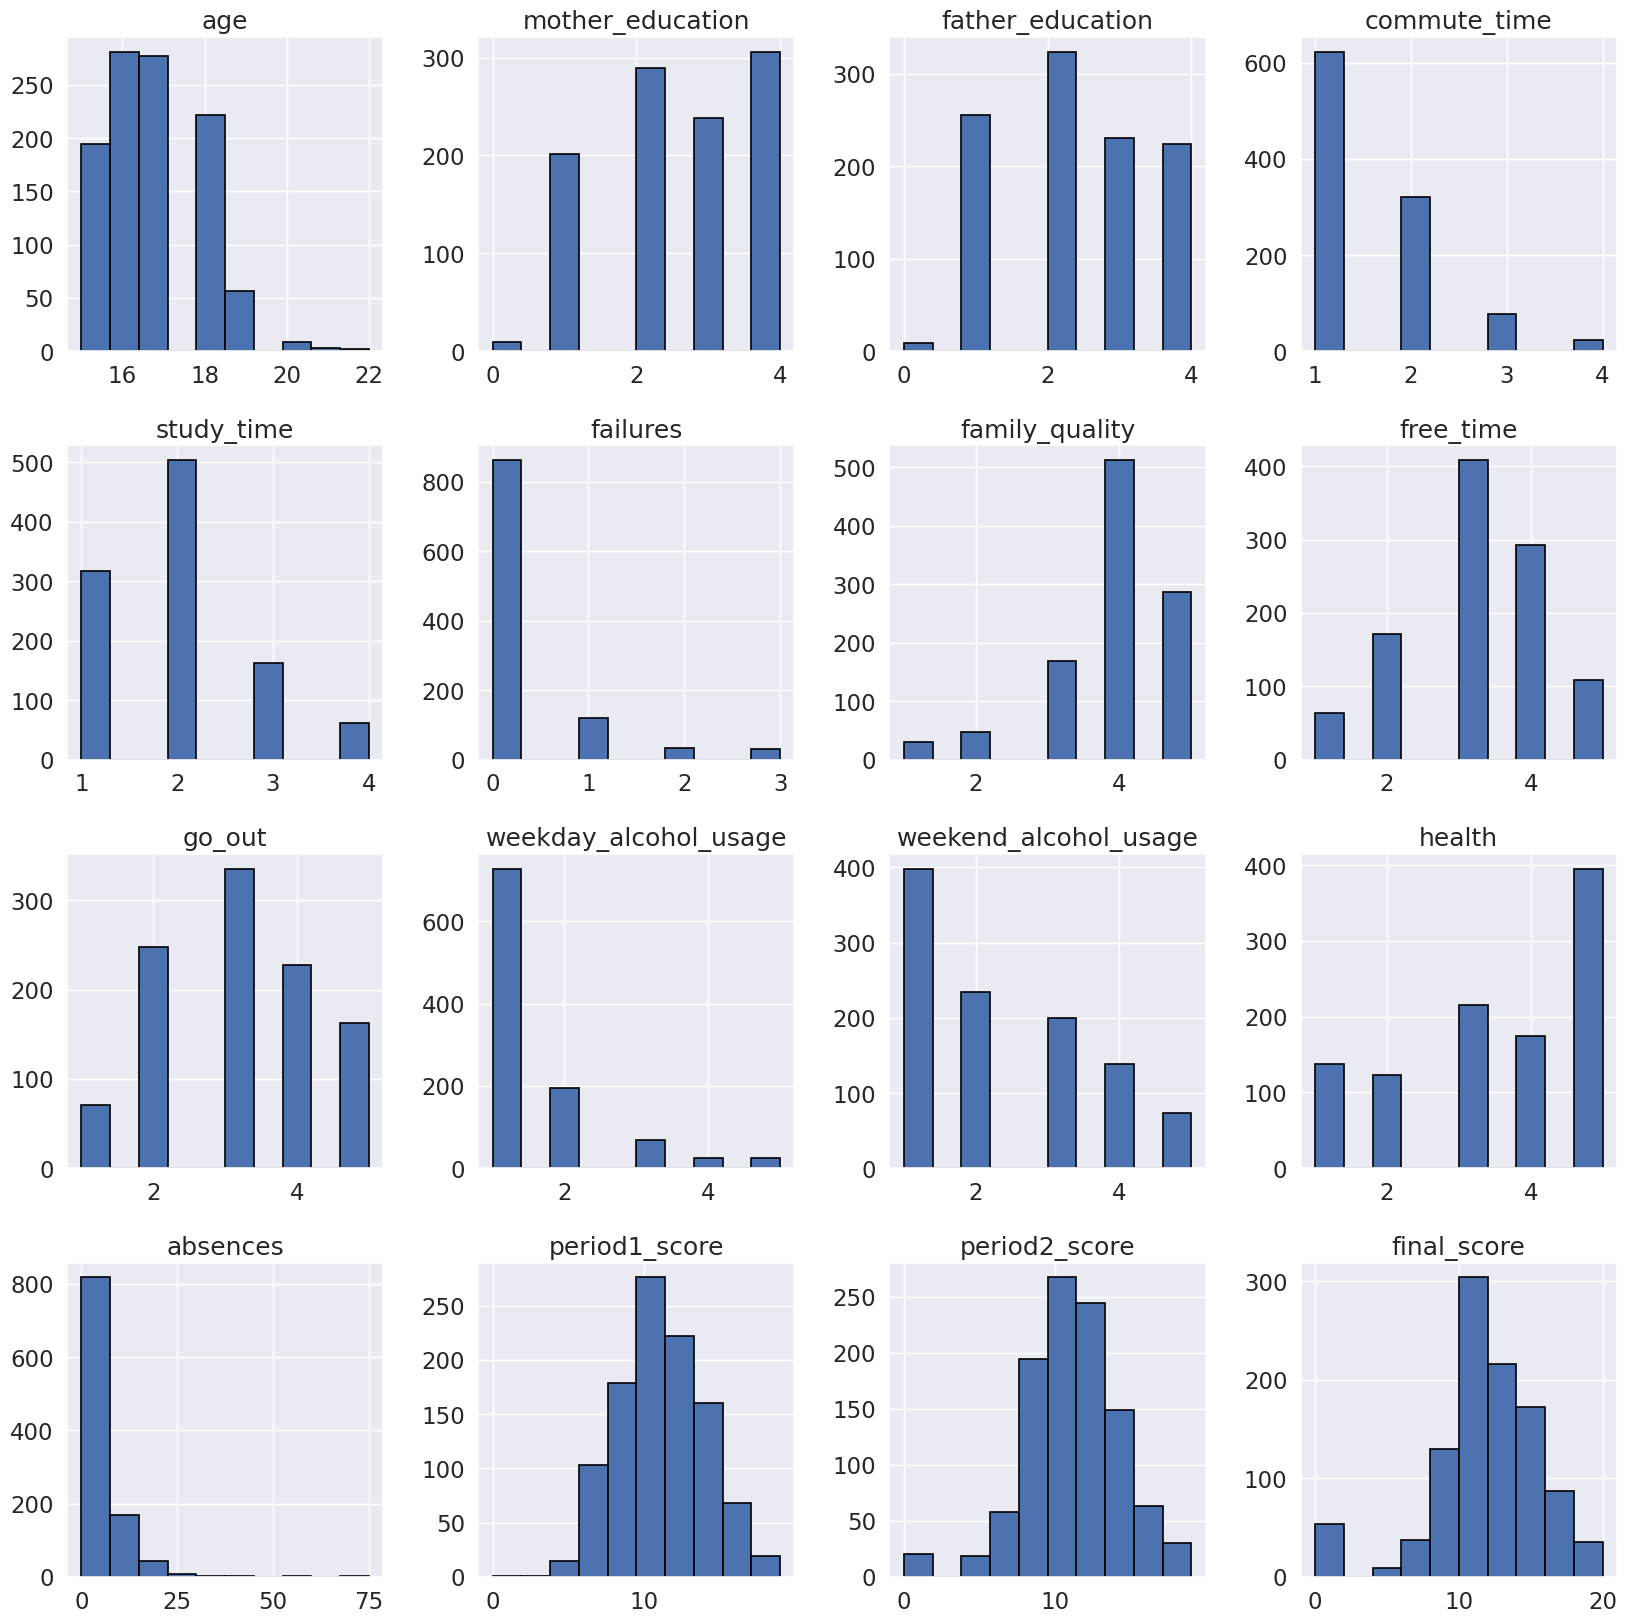

In [ ]:
# merge_dataset['school'].replace({'GP': 0, 'MS': 1}, inplace=True)
# student_mat['school'].replace({0: 'GP', 1: 'MS'}, inplace=True)
# student_mat['school']

merge_dataset.hist(edgecolor='black', linewidth=1.2)
fig = plt.gcf()
fig.set_size_inches(20,20)
plt.show()

### **C).   Tampikan statistik (Mean, Median, Mode, Standard Deviation, dan Kuartil) dari setiap fitur data**

In [ ]:
print("MATHEMATICS DATASET\n")
student_por.describe()

MATHEMATICS DATASET



,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


In [ ]:
print("PORTUGUESE DATASET\n")
student_mat.describe()

PORTUGUESE DATASET



,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [ ]:
print("MERGE DATASET\n")
merge_dataset.describe()

MERGE DATASET



,age,mother_education,father_education,commute_time,study_time,failures,family_quality,free_time,go_out,weekday_alcohol_usage,weekend_alcohol_usage,health,absences,period1_score,period2_score,final_score
count,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000
mean,16.726054,2.603448,2.387931,1.522989,1.970307,0.264368,3.935824,3.201149,3.156130,1.494253,2.284483,3.543103,4.434866,11.213602,11.246169,11.341954
std,1.239975,1.124907,1.099938,0.731727,0.834353,0.656142,0.933401,1.031507,1.152575,0.911714,1.285105,1.424703,6.210017,2.983394,3.285071,3.864796
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,9.000000,9.000000,10.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [ ]:
# Dengan Cara Satuan
dt_mean = merge_dataset.mean(numeric_only=True)
dt_median = merge_dataset.median(numeric_only=True)
dt_std_deviation = merge_dataset.std(numeric_only=True)
dt_quartile = merge_dataset.quantile(numeric_only=True)

In [ ]:
print("MEAN MERGE DATASET\n=============")
print(dt_mean)

MEAN MERGE DATASET
age                      16.726054
mother_education          2.603448
father_education          2.387931
commute_time              1.522989
study_time                1.970307
failures                  0.264368
family_quality            3.935824
free_time                 3.201149
go_out                    3.156130
weekday_alcohol_usage     1.494253
weekend_alcohol_usage     2.284483
health                    3.543103
absences                  4.434866
period1_score            11.213602
period2_score            11.246169
final_score              11.341954
dtype: float64


In [ ]:
print("MEDIAN MERGE DATASET\n=============")
print(dt_median)

MEDIAN MERGE DATASET
age                      17.0
mother_education          3.0
father_education          2.0
commute_time              1.0
study_time                2.0
failures                  0.0
family_quality            4.0
free_time                 3.0
go_out                    3.0
weekday_alcohol_usage     1.0
weekend_alcohol_usage     2.0
health                    4.0
absences                  2.0
period1_score            11.0
period2_score            11.0
final_score              11.0
dtype: float64


In [ ]:
print("STANDARD DEVIATION MERGE DATASET\n=============")
print(dt_std_deviation)

STANDARD DEVIATION MERGE DATASET
age                      1.239975
mother_education         1.124907
father_education         1.099938
commute_time             0.731727
study_time               0.834353
failures                 0.656142
family_quality           0.933401
free_time                1.031507
go_out                   1.152575
weekday_alcohol_usage    0.911714
weekend_alcohol_usage    1.285105
health                   1.424703
absences                 6.210017
period1_score            2.983394
period2_score            3.285071
final_score              3.864796
dtype: float64


In [ ]:
print("QUARTILE MERGE DATASET\n=============")
print(dt_quartile)

QUARTILE MERGE DATASET
age                      17.0
mother_education          3.0
father_education          2.0
commute_time              1.0
study_time                2.0
failures                  0.0
family_quality            4.0
free_time                 3.0
go_out                    3.0
weekday_alcohol_usage     1.0
weekend_alcohol_usage     2.0
health                    4.0
absences                  2.0
period1_score            11.0
period2_score            11.0
final_score              11.0
Name: 0.5, dtype: float64


### **D).   Tampilkan distribusi dari fitur? Plot histogram untuk mengetahui hal ini. Jelaskan tentang distibusi ini. Apa yang menarik?** *(10 fitur yg Memungkinkan)*

### D.1. Pengelompokkan Siswa Lulus dan Tidak Lulus Berdasarkan Nilai Akhir

In [ ]:
print("fair ->",fair, "; poor ->",poor, "; good ->",good, "\n")

fair -> 610 ; poor -> 230 ; good -> 204 



Text(0.5, 1.0, 'Final Grade - Keseluruhan Siswa')

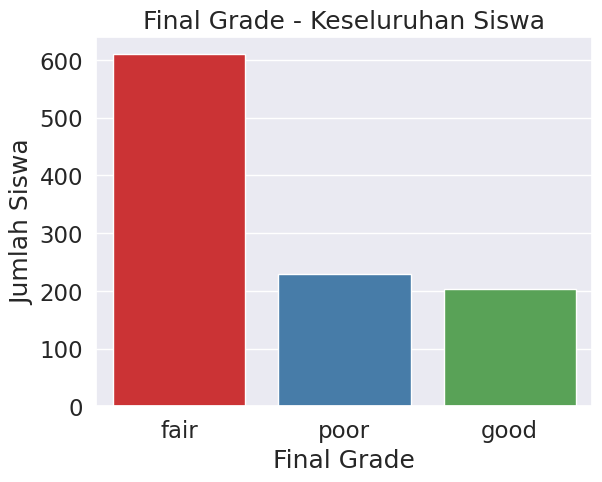

In [ ]:
ax = sns.countplot(x='final_grade',data=merge_dataset, order=merge_dataset['final_grade'].value_counts().index, palette="Set1")
ax.set_xticklabels(('fair', 'poor', 'good'))
plt.ylabel('Jumlah Siswa')
plt.xlabel('Final Grade')
plt.title('Final Grade - Keseluruhan Siswa')

Pada Data Diatas Dapat Disimpulkan dari data student-mat.csv dan student-por.csv

**Siswa Yang Lulus** = fair + Good = 610 + 204 **= 814**

**Siswa Yang Tidak Lulus = 230**

###  D.2. Dampak Nilai Akhir Berdasarkan Sekolah

Text(0.5, 1.0, 'Perbandingan dari Final Grades Antar Sekolah')

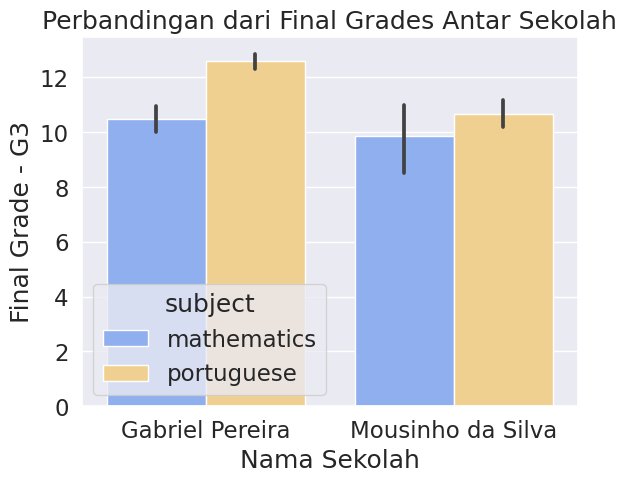

In [ ]:
# merge_dataset.head(10)
ax = sns.barplot(x='school', y='final_score', hue='subject', data=merge_dataset, palette=['#80aaff', '#ffd580'])

ax.get_cursor_data
ax.set_xticklabels(('Gabriel Pereira', 'Mousinho da Silva'))
plt.xlabel('Nama Sekolah')
plt.ylabel('Final Grade - G3')
plt.title('Perbandingan dari Final Grades Antar Sekolah')

Berdasarkan Data Diatas Dapat Disimpulkan:

Bahwa Sekolah **Gabriel Pereira Lebih Baik Mousinho da Silva** Dari Final Grade Pelajaran Matematika maupun Pelajaran Bahasa Portugese


### D.3. Dampak Nilai Akhir Berdasarkan Gender/Sex

<Figure size 640x480 with 0 Axes>

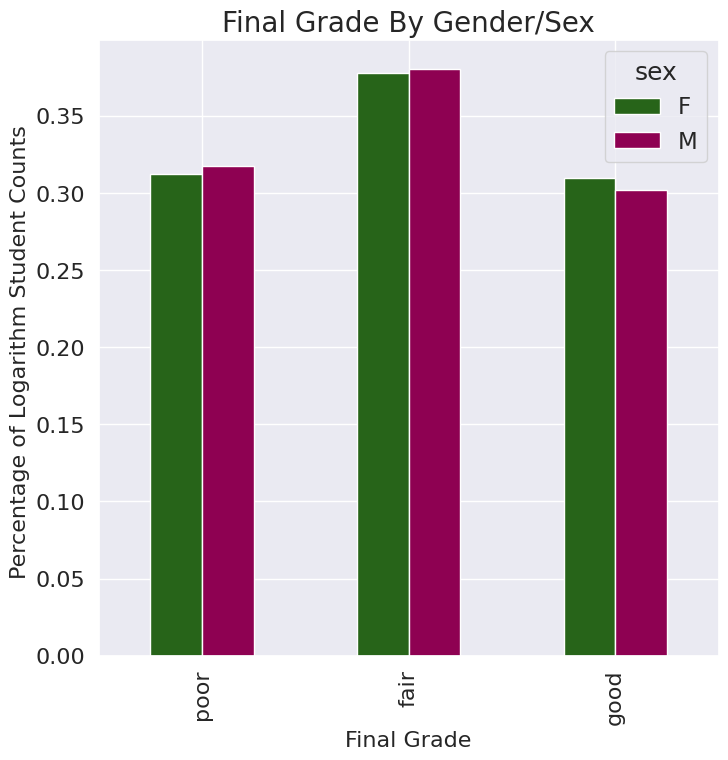

In [ ]:
perc = (lambda col: col/col.sum())
index = ['poor','fair','good']
sex_tab1 = pd.crosstab(index=merge_dataset.final_grade, columns=merge_dataset.sex)
sex_tab = np.log(sex_tab1)
sex_perc = sex_tab.apply(perc).reindex(index)

plt.figure()
sex_perc.plot.bar(colormap="PiYG_r", fontsize=16, figsize=(8,8))
plt.title('Final Grade By Gender/Sex', fontsize=20)
plt.ylabel('Percentage of Logarithm Student Counts ', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)
plt.show()

In [ ]:
print(sex_tab1)
print("\n=================================\n")
print(sex_perc)

sex            F    M
final_grade          
fair         346  264
good         120   84
poor         125  105


sex                 F         M
final_grade                    
poor         0.312265  0.317444
fair         0.378111  0.380332
good         0.309625  0.302224


Dari Data Diatas Dapat disimpulkan

Lulus = 814 (Fair Or Good)

Lulus (Female) =  346(Fair) + 120(Good) = 466

Lulus (Male) = 264(Fair) + 84(Good) = 348

**Kelulusan Lebih Banyak Didominasi oleh Female**

**Predikat (Fair) dan (Good) Juga Di dominasi oleh gender Female**

###  D.4. Dampak Nilai Akhir Berdasarkan Status Hidup Bersama Orang Tua

Text(0.5, 0, 'Final Grade')

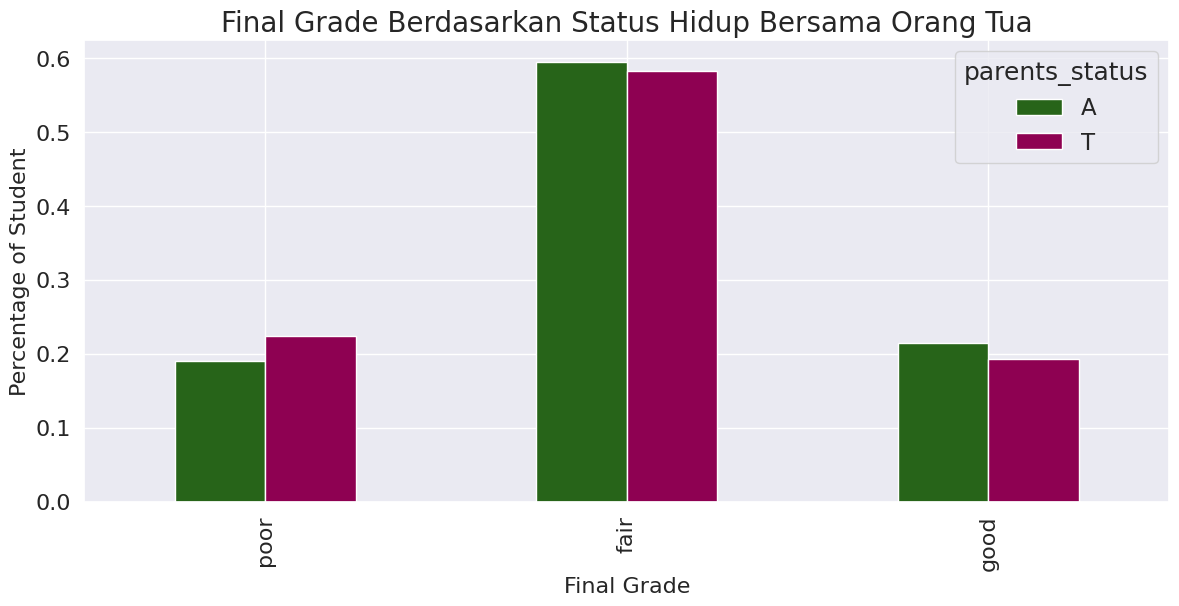

In [ ]:
out_tab = pd.crosstab(index=merge_dataset.final_grade, columns=merge_dataset.parents_status)
out_perc = out_tab.apply(perc).reindex(index)

out_perc.plot.bar(colormap="PiYG_r", fontsize=16, figsize=(14,6))
plt.title('Final Grade Berdasarkan Status Hidup Bersama Orang Tua', fontsize=20)
plt.ylabel('Percentage of Student', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)

In [ ]:
print("(binary: 'T' - Hidup Bersama or 'A' - Terpisah)\n")


print(out_tab)
print("\n===================================\n")
print(out_perc)

(binary: 'T' - Hidup Bersama or 'A' - Terpisah)

parents_status   A    T
final_grade            
fair            72  538
good            26  178
poor            23  207


parents_status         A         T
final_grade                       
poor            0.190083  0.224269
fair            0.595041  0.582882
good            0.214876  0.192849


Dari Data Diatas Dapat Disimpulkan: **Hidup bersama Orang Tua Tidak Menjadi Tolak Ukur Kelulusan Siswa**

karena pada Final Grade (poor) Jumlah Siswa yg Hidup Bersama Org tua ("T") Lebih Banyak Dibanding Jumlah Siswa yg Hidup Terpisah Dgn Org Tua("A")


### D.5. Dampak Nilai Akhir Berdasarkan Tempat Tinggal

(binary: 'U' - urban/kota or 'R' - rural/perdesaan)



Text(0.5, 1.0, 'Hidup Dibagian Perdesaan Vs Perkotaan')

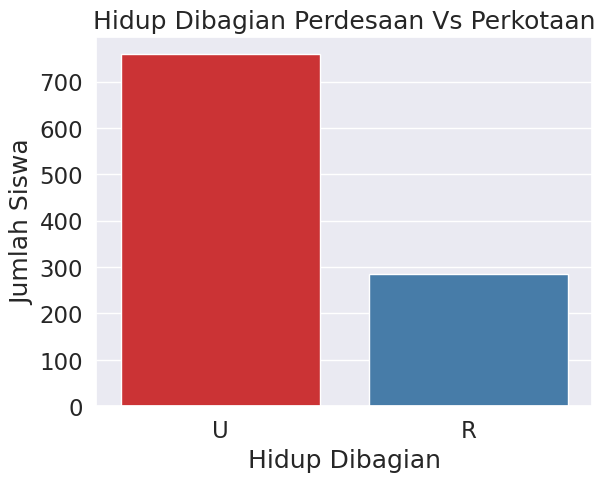

In [ ]:
print("(binary: 'U' - urban/kota or 'R' - rural/perdesaan)\n")
ax = sns.countplot(x='address',data=merge_dataset, order=merge_dataset['address'].value_counts().index, palette="Set1")
ax.set_xticklabels(('U', 'R'))
plt.ylabel('Jumlah Siswa')
plt.xlabel('Hidup Dibagian')
plt.title('Hidup Dibagian Perdesaan Vs Perkotaan')

In [ ]:
final_grade1 = pd.crosstab(index=merge_dataset.final_grade, columns=merge_dataset.address)
final_grade_tab = np.log(final_grade1)
final_grade_tab_perc = final_grade_tab.apply(perc).reindex(index)

Text(0.5, 0, 'Final Grade')

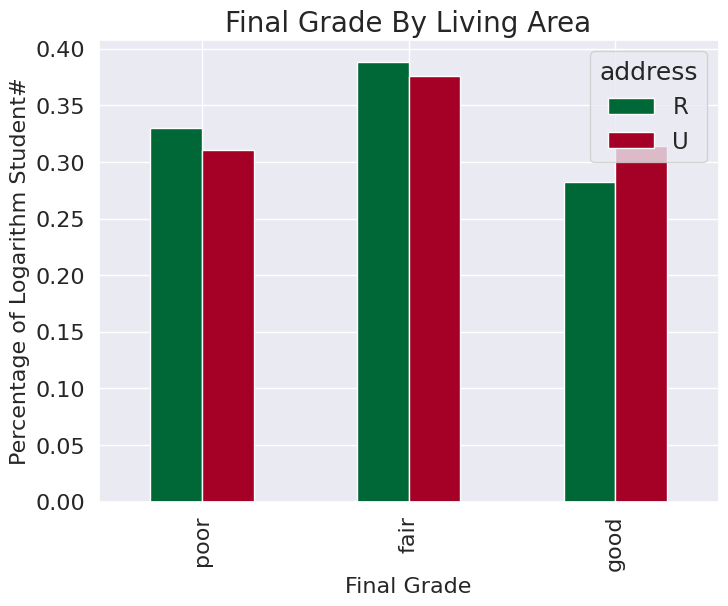

In [ ]:
final_grade_tab_perc.plot.bar(colormap="RdYlGn_r", fontsize=16, figsize=(8,6))
plt.title('Final Grade By Living Area', fontsize=20)
plt.ylabel('Percentage of Logarithm Student#', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)

In [ ]:
# chi-square test result -- significant!
print(final_grade1,'\n')
ad_table = sm.stats.Table(final_grade1)
ad_rslt = ad_table.test_nominal_association()
ad_rslt.pvalue

address        R    U
final_grade          
fair         167  443
good          41  163
poor          77  153 



0.007608910517873602

Dari Data Diatas Dapat Disimpulkan: **Lebih Baik Menetap Di Kota/Urban**

### D.6. Alasan Memilih Sekolah

Text(0.5, 1.0, 'Alasan Memilih Sekolah')

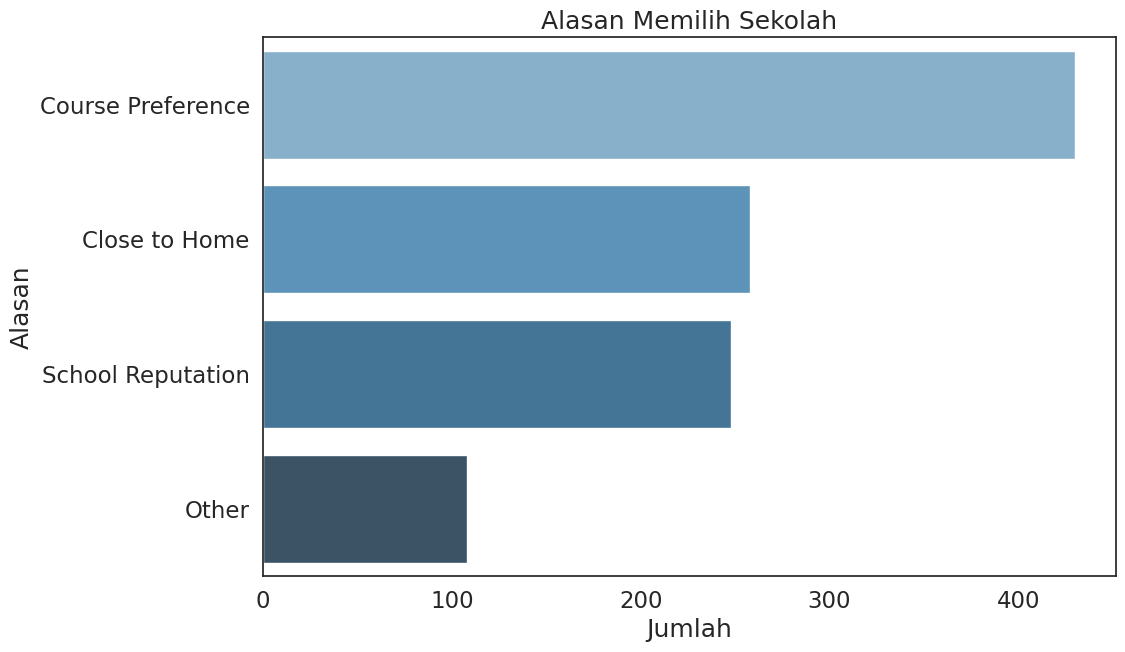

In [ ]:
plt.figure(figsize=(11,7))
sns.set(font_scale=1.5)
sns.set_style('white')

ax = sns.countplot(y='reason',data=merge_dataset, order=merge_dataset['reason'].value_counts().index, palette="Blues_d")

ax.set_yticklabels(('Course Preference', 'Close to Home', 'School Reputation', 'Other'))
plt.ylabel('Alasan')
plt.xlabel('Jumlah')
plt.title('Alasan Memilih Sekolah')

Berdasarkan Data Diatas Alasan Siswa Memilih Sekolah Karena:

**Course Preferances Adalah Alasan Terbanyak**,

Kemudian Dilanjutkan dengan "*close to home*", "*School Reputation*",

dan Selebihnya Karena Alasan Lain "*Other*"

### D.7 Dampak Nilai Akhir Berdasarkan Study Time/Waktu Belajar

Text(0.5, 0, 'Final Score - G3')

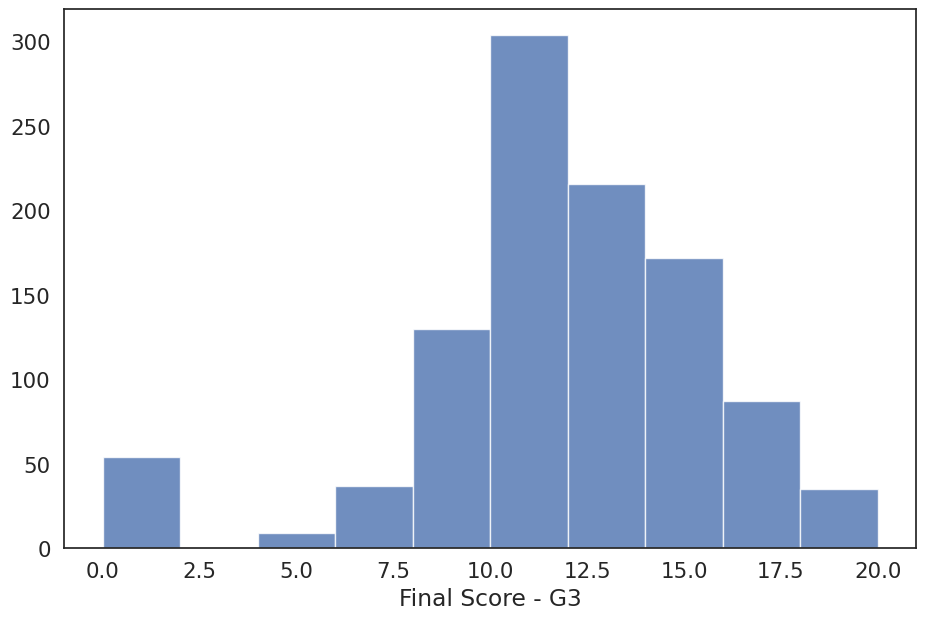

In [ ]:
plt.figure(figsize=(11,7))
sns.set(font_scale=1.4)
sns.set_style('white')

plt.hist(merge_dataset.final_score, alpha=0.8, bins=10)

plt.xlabel('Final Score - G3')

Text(0.5, 1.0, 'Final Grades by Study Time')

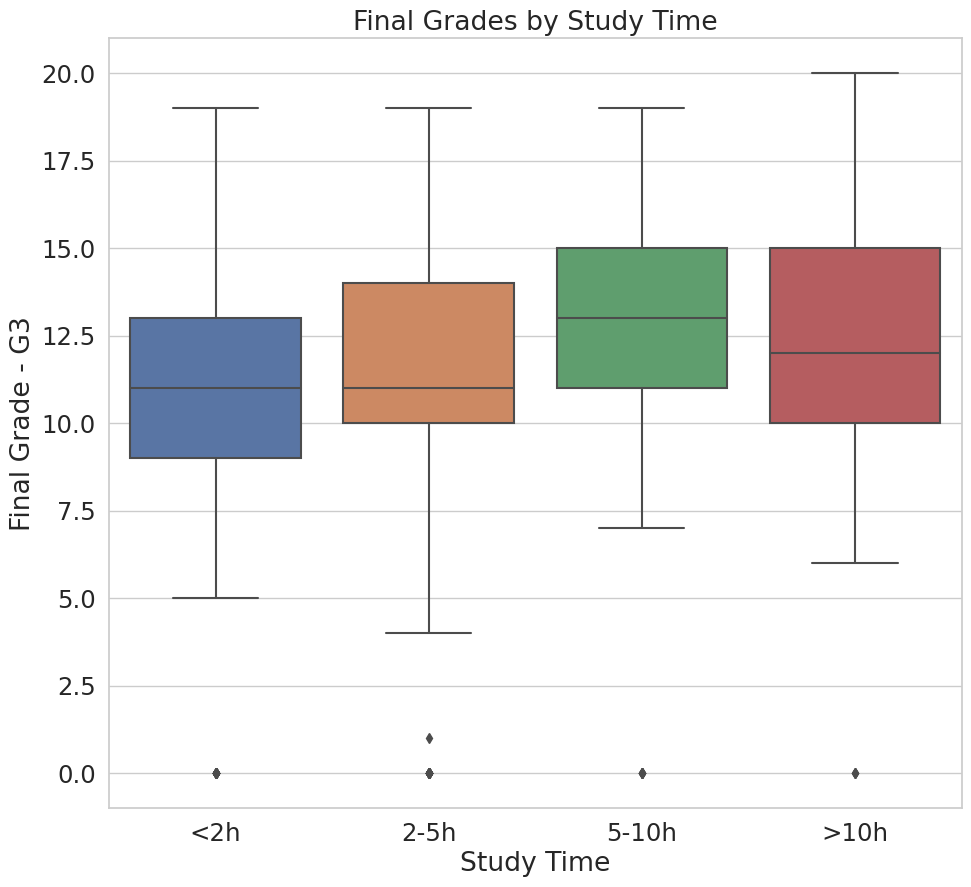

In [ ]:
# Transforming Values
merge_dataset['study_time'] = merge_dataset['study_time'].map({1: '<2h', 2: '2-5h', 3: '5-10h', 4: '>10h'})

plt.figure(figsize=(11,10))
sns.set(font_scale=1.6)
sns.set_style('whitegrid')

sns.boxplot(x='study_time', y='final_score', data=merge_dataset, order=['<2h','2-5h','5-10h','>10h'])

plt.xlabel('Study Time')
plt.ylabel('Final Grade - G3')
plt.title('Final Grades by Study Time')

Berdasarkan Data Diatas Alasan Siswa Memilih Sekolah Karena:

Siswa yang **belajar lebih sedikit waktu**, mempunyai nilai **Terendah**

Siswa yang **waktu belajar 2-5 jam memiliki Rata2 yang sama dengan <2 jam**

Siswa yang **waktu belajar 5-10 jam memiliki Hasil Nilai Tertinggi yang sama dengan >10 Jam**

Siswa yang **waktu belajar >10 Jam Tidak Lebih Baik dari Belajar 5-10 jam, Malah memungkinkan mendapat nilai 10.0 lebih buruk dari batas bawah nilai yang belajar 5-10 jam yaitu 11.0**



### D.8 Dampak Nilai Akhir Berdasarkan Waktu Perjalanan ke sekolah

In [ ]:
merge_dataset['commute_time'] = merge_dataset['commute_time'].map({1: '<15m', 2: '15-30m', 3: '30-1h', 4: '>1h'})

Text(0.5, 1.0, 'Relation Between Grades And Absences by Travel Time/Commute Time')

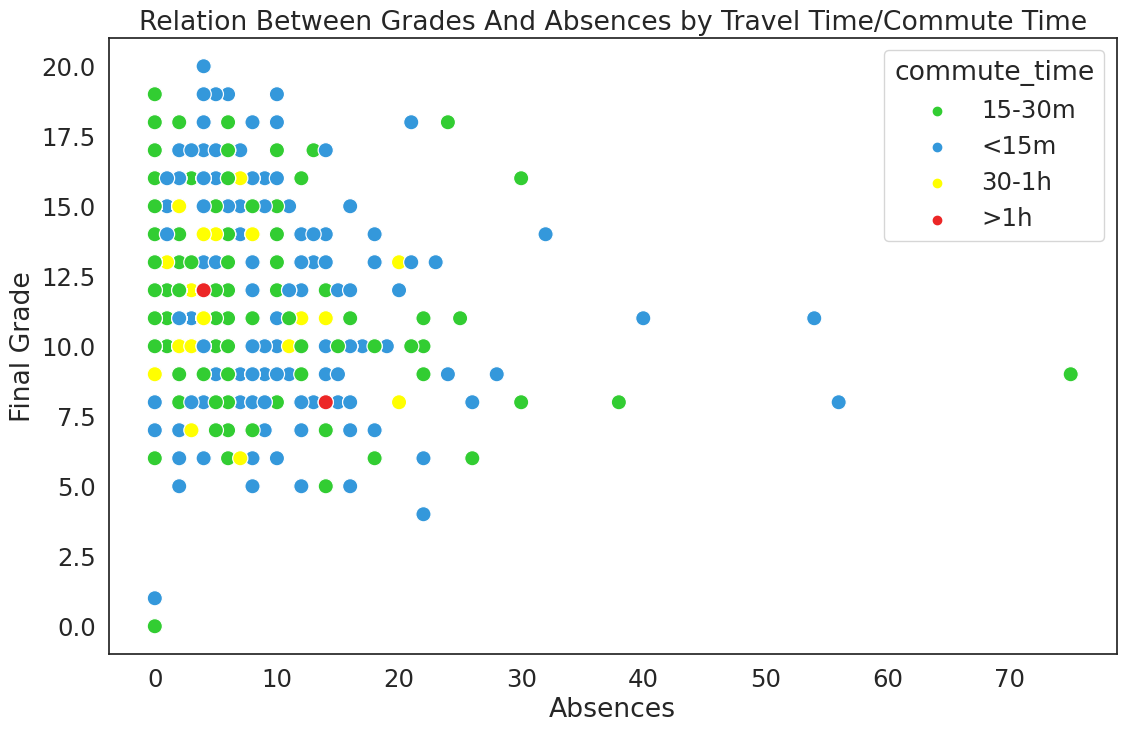

In [ ]:
plt.figure(figsize=(13,8))
sns.set(font_scale=1.6)
sns.set_style('white')

sns.scatterplot(y='final_score', x='absences', hue='commute_time', data=merge_dataset, s=120,
                palette=["#32cd32", "#3498db", "#ffff00", "#ec2626"])

plt.xlabel('Absences')
plt.ylabel('Final Grade')
plt.title('Relation Between Grades And Absences by Travel Time/Commute Time')

Berdasarkan Data Diatas Jarak Siswa ke Sekolah:

**Bisa mempengaruhi nilai**.

siswa yang memerlukan waktu sampai ke sekolah **>1 Jam** Nilai Tertinggi nya memiliki nilai dibawah 12.5

siswa yang memerlukan waktu sampai ke sekolah **30 menit - 1 Jam** Nilai Tertinggi nya sekitar 16.5

siswa yang memerlukan waktu sampai ke sekolah **<15 menit atau 15-30 menit** Nilai Tertinggi bisa mencapai 19.0 sampai 20.0



### D.9 Dampak Nilai Akhir Berdasarkan Hubungan Asmara

Text(0.5, 0, 'Has Romantic Relationship?')

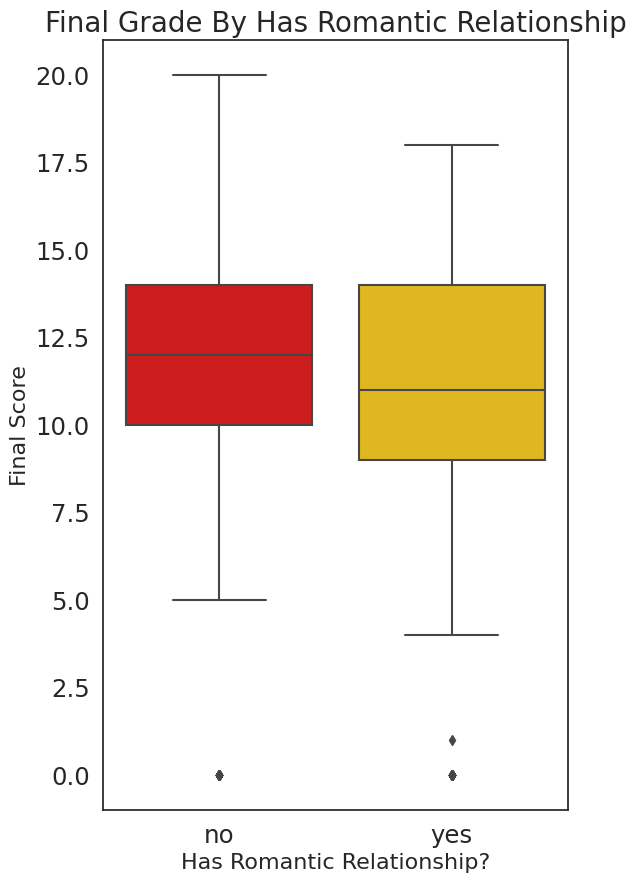

In [ ]:
plt.figure(figsize=(6,10))
sns.boxplot(x='romantic', y='final_score', data=merge_dataset, palette='hot')
plt.title('Final Grade By Has Romantic Relationship', fontsize=20)
plt.ylabel('Final Score', fontsize=16)
plt.xlabel('Has Romantic Relationship?', fontsize=16)

<Figure size 640x480 with 0 Axes>

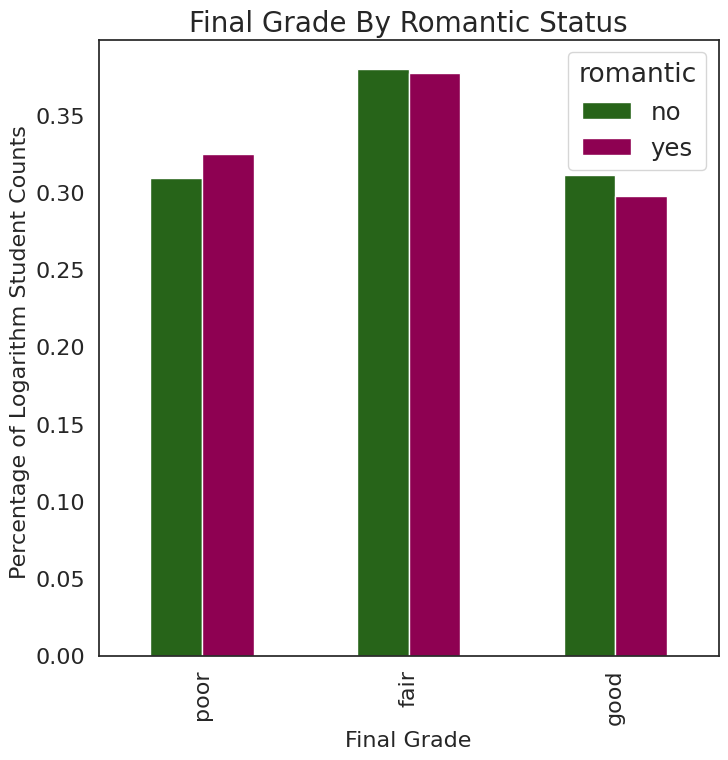

In [ ]:
# romantic status
perc = (lambda col: col/col.sum())
index = ['poor','fair','good']
romance_tab1 = pd.crosstab(index=merge_dataset.final_grade, columns=merge_dataset.romantic)
romance_tab = np.log(romance_tab1)
romance_perc = romance_tab.apply(perc).reindex(index)

plt.figure()
romance_perc.plot.bar(colormap="PiYG_r", fontsize=16, figsize=(8,8))
plt.title('Final Grade By Romantic Status', fontsize=20)
plt.ylabel('Percentage of Logarithm Student Counts ', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)
plt.show()

Hipotesis menegaskan, status siswa yang mempunyai hubungan asmara berdampak pada nilai akhir.

In [ ]:
# chi-square test result -- significant!
import statsmodels.api as sm

romance_table = sm.stats.Table(romance_tab1)
romance_rslt = romance_table.test_nominal_association()
romance_rslt.pvalue

0.038810128743959726

Berdasarkan Data Diatas, Memiliki Hubungan Asmara di Sekolah:

**Bisa mempengaruhi nilai**.

### D.10 Dampak Nilai Akhir Berdasarkan Seringnya Hangout Dengan Teman

Text(0.5, 0, 'Frequency of Going Out')

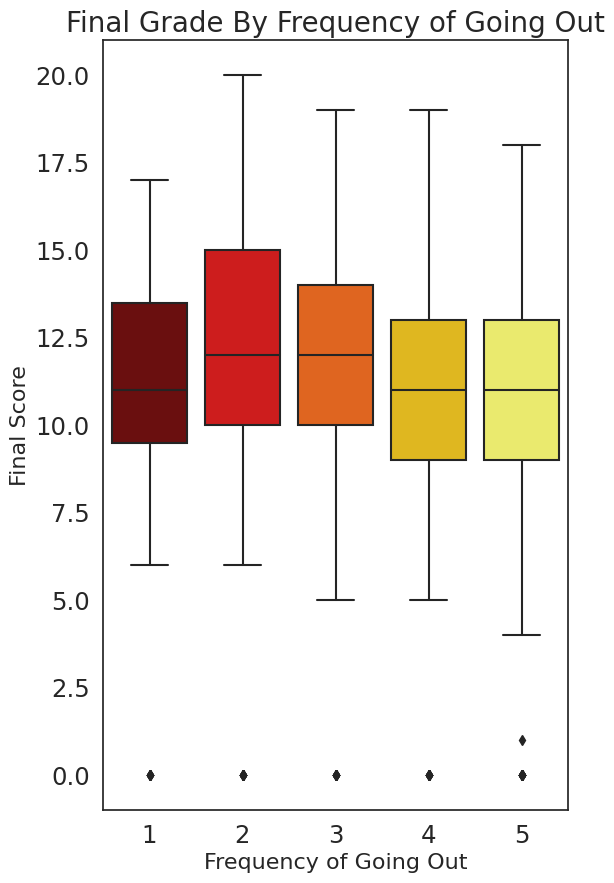

In [ ]:
# going out with friends (numeric: from 1 - very low to 5 - very high)
plt.figure(figsize=(6,10))
sns.boxplot(x='go_out', y='final_score', data=merge_dataset, palette='hot')
plt.title('Final Grade By Frequency of Going Out', fontsize=20)
plt.ylabel('Final Score', fontsize=16)
plt.xlabel('Frequency of Going Out', fontsize=16)

Text(0.5, 0, 'Final Grade')

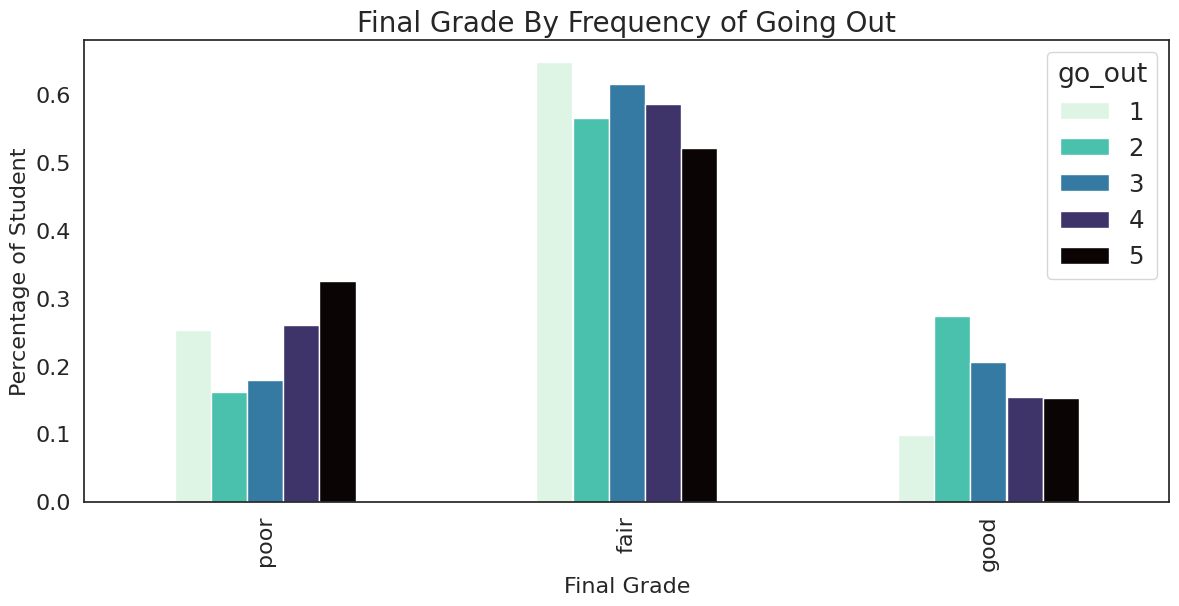

In [ ]:
out_tab = pd.crosstab(index=merge_dataset.final_grade, columns=merge_dataset.go_out)
out_perc = out_tab.apply(perc).reindex(index)

out_perc.plot.bar(colormap="mako_r", fontsize=16, figsize=(14,6))
plt.title('Final Grade By Frequency of Going Out', fontsize=20)
plt.ylabel('Percentage of Student', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)

# merge_dataset.isnull().any()

Hipotesis menegaskan, status siswa yang sering hangout bersama teman berdampak pada nilai akhir.

In [ ]:
# chi-square test result -- significant!
out_table = sm.stats.Table(out_tab)
out_rslt = out_table.test_nominal_association()
out_rslt.pvalue

4.365198328282194e-05

Berdasarkan Data Diatas, Seringnya Hangout Bersama Teman:

**Bisa mempengaruhi nilai Namun Tidak Signifikan**



# **3. Explorasi penerapan metode machine learning konvensional**

## **A).   Gunakan konfigurasi default dari setiap model (train test split : 80 dan 20%) dan Gunakan 10-fold cross validation**



In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold # to split the dataset for training and testing
from sklearn.tree import DecisionTreeClassifier # for using DTA
from sklearn import metrics, preprocessing, model_selection # for checking the model accuracy
from sklearn.neighbors import KNeighborsClassifier # KNN classifier
from sklearn import svm # for suport vector machine algorithm
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression # for Logistic Regression Algorithm
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
import xgboost as xgb

In [ ]:
# create dataframe dfd for classification
dfd = merge_dataset.copy()
dfd = dfd.drop(['final_score'], axis=1)
dfd = dfd.drop(['subject'], axis=1)

# label encode final_grade
le = preprocessing.LabelEncoder()
dfd.final_grade = le.fit_transform(dfd.final_grade)

# dataset train_test_split
X = dfd.drop('final_grade',axis=1)
y = dfd.final_grade

# our main data split into train and test
# the attribute test_size=0.2 splits the data into 80% and 20% ratio. train=80% and test=20%
# menggunakan 100 data, karena data terlalu banyak
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=42)
# X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=80, test_size=20, random_state=42)

In [ ]:
# get dummy varibles
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

print("Ukuran data:", len(y))
print("Ukuran X_train:", len(X_train))
print("Ukuran X_test:", len(X_test))
print("Ukuran y_train:", len(y_train))
print("Ukuran y_test:", len(y_test))

Ukuran data: 1044
Ukuran X_train: 835
Ukuran X_test: 209
Ukuran y_train: 835
Ukuran y_test: 209


In [ ]:
X_train.head()

,age,mother_education,father_education,commute_time,study_time,failures,family_quality,free_time,go_out,weekday_alcohol_usage,...,activities_no,activities_yes,nursery_no,nursery_yes,desire_higher_edu_no,desire_higher_edu_yes,internet_no,internet_yes,romantic_no,romantic_yes
136,16,2,1,4,1,0,3,2,1,1,...,1,0,0,1,0,1,1,0,1,0
256,17,4,2,1,4,0,4,2,3,1,...,0,1,0,1,0,1,0,1,1,0
350,19,1,1,3,2,3,5,4,4,3,...,1,0,0,1,0,1,0,1,1,0
60,16,4,4,1,2,0,2,4,4,2,...,0,1,0,1,0,1,1,0,1,0
535,15,1,2,3,2,0,5,5,5,1,...,0,1,0,1,0,1,1,0,1,0


In [ ]:
X_test.head()

,age,mother_education,father_education,commute_time,study_time,failures,family_quality,free_time,go_out,weekday_alcohol_usage,...,activities_no,activities_yes,nursery_no,nursery_yes,desire_higher_edu_no,desire_higher_edu_yes,internet_no,internet_yes,romantic_no,romantic_yes
576,18,3,2,2,1,0,2,5,5,5,...,1,0,1,0,0,1,0,1,1,0
280,17,4,1,2,1,0,4,5,4,2,...,0,1,0,1,0,1,0,1,0,1
141,16,1,1,4,2,0,5,1,3,1,...,1,0,0,1,0,1,1,0,1,0
429,16,4,4,1,2,0,5,3,2,1,...,1,0,0,1,0,1,1,0,1,0
249,16,3,2,2,3,0,5,3,3,1,...,0,1,0,1,0,1,0,1,0,1


In [ ]:
y_train.head()

136    0
256    0
350    2
60     0
535    0
Name: final_grade, dtype: int64

### **3.A.I  Naive bayes (train test split : 80 dan 20%)**

In [ ]:
gnb = GaussianNB()

gnb.fit(X_train, y_train)
prediction = gnb.predict(X_test)

accuray1 = metrics.accuracy_score(prediction, y_test)

print("The accuracy of Naive Bayes is:", accuray1)

The accuracy of Naive Bayes is: 0.5215311004784688


### **3.A.II Naive bayes (10-Fold Cross Validation)**

In [ ]:
# Applying 10-Fold Cross Validation
scores1 = cross_val_score(gnb, X_train, y_train, cv = 10, scoring='accuracy')

print('Naive Bayes Cross-validation scores:\n{}\n'.format(scores1))
print('Naive Bayes Average cross-validation score: {}\n'.format(scores1.mean()))

Naive Bayes Cross-validation scores:
[0.39285714 0.48809524 0.55952381 0.33333333 0.46428571 0.45783133
 0.53012048 0.44578313 0.5060241  0.44578313]

Naive Bayes Average cross-validation score: 0.4623637406769937



### **3.A.I Decision Tree (train test split : 80 dan 20%)**

In [ ]:
decisionTC = DecisionTreeClassifier()
decisionTC.fit(X_train, y_train)
prediction = decisionTC.predict(X_test)

accuray2 = metrics.accuracy_score(prediction, y_test)
print('The accuracy of Decision Tree is: ', accuray2)

The accuracy of Decision Tree is:  0.8038277511961722


### **3.A.II Decision Tree (10-Fold Cross Validation)**

In [ ]:
#10-Fold Cross Validation
scores2 = cross_val_score(decisionTC, X_train, y_train, cv = 10, scoring='accuracy')
print('Decision Tree Cross-validation scores:\n{}\n'.format(scores2))
print('Decision Tree Average cross-validation score: {}\n'.format(scores2.mean()))

Decision Tree Cross-validation scores:
[0.8452381  0.79761905 0.88095238 0.86904762 0.77380952 0.89156627
 0.85542169 0.85542169 0.89156627 0.75903614]

Decision Tree Average cross-validation score: 0.8419678714859439



### **3.A.I KNN (train test split : 80 dan 20%)**

In [ ]:
knnC = KNeighborsClassifier()
knnC.fit(X_train, y_train)
prediction = knnC.predict(X_test)

accuray3 = metrics.accuracy_score(prediction, y_test)
print('The accuracy of KNN is: ', accuray3)

The accuracy of KNN is:  0.7990430622009569


### **3.A.II KNN (10-Fold Cross Validation)**

In [ ]:
#10-Fold Cross Validation
scores3 = cross_val_score(knnC, X_train, y_train, cv = 10, scoring='accuracy')
print('KNN Cross-validation scores:\n{}\n'.format(scores3))
print('KNN Average cross-validation score: {}\n'.format(scores3.mean()))

KNN Cross-validation scores:
[0.79761905 0.83333333 0.9047619  0.88095238 0.79761905 0.89156627
 0.86746988 0.86746988 0.91566265 0.75903614]

KNN Average cross-validation score: 0.8515490533562822



### **3.A.I Support vector machine (train test split : 80 dan 20%)**

In [ ]:
suppVM = svm.SVC() # select the svm algorithm

# we train the algorithm with training data and training output
suppVM.fit(X_train, y_train)
prediction = suppVM.predict(X_test)

accuray4 = metrics.accuracy_score(prediction, y_test)
print('The accuracy of the SVM is: ', accuray4)

# s= suppVM.fit(X_train, y_train)
# print("SVC Model Score" , ":" , s.score(X_train, y_train) , "," ,
#       "Cross Validation Score" ,":" , s.score(X_test, y_test))

The accuracy of the SVM is:  0.8325358851674641


### **3.A.II Suppport vector machine (10-Fold Cross Validation)**

In [ ]:
#10-Fold Cross Validation
scores4 = cross_val_score(suppVM, X_train, y_train, cv = 10, scoring='accuracy')
print('SVM Cross-validation scores:\n{}\n'.format(scores4))
print('SVM Average cross-validation score: {}\n'.format(scores4.mean()))

SVM Cross-validation scores:
[0.8452381  0.89285714 0.91666667 0.88095238 0.80952381 0.89156627
 0.90361446 0.93975904 0.91566265 0.81927711]

SVM Average cross-validation score: 0.8815117613310385



### **3.A.I Logistic regression (train test split : 80 dan 20%)**

In [ ]:
from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.transform(X_test)

lr = LogisticRegression(random_state = 0)
lr.fit(X_train, y_train)

prediction = lr.predict(X_test)
accuray5 = metrics.accuracy_score(prediction, y_test)
print ("The accuracy of the Logistic regression is: : ", accuray5)

The accuracy of the Logistic regression is: :  0.8277511961722488


### **3.A.II Logistic regression (10-Fold Cross Validation)**

In [ ]:
#10-Fold Cross Validation
scores5 = cross_val_score(lr, X_train, y_train, cv = 10, scoring='accuracy')
print('Logistic regression Cross-validation scores:\n{}\n'.format(scores5))
print('Logistic regression Average cross-validation score: {}\n'.format(scores5.mean()))

Logistic regression Cross-validation scores:
[0.8452381  0.8452381  0.89285714 0.91666667 0.75       0.86746988
 0.92771084 0.87951807 0.86746988 0.79518072]

Logistic regression Average cross-validation score: 0.858734939759036



### **3.A.I XGBoost (train test split : 80 dan 20%)**

In [ ]:
import re
regex = re.compile(r"\[|\]|<", re.IGNORECASE)

# Create DMatrix for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# params = {
#             'objective':'binary:logistic',
#             'max_depth': 4,
#             'alpha': 10,
#             'learning_rate': 1.0,
#             'n_estimators':10
#         }
# instantiate the classifier
# xgb_clf = XGBClassifier(**params)

xgb_clf = XGBClassifier()

# fit the classifier to the training data
xgb_clf.fit(X_train, y_train)

# make predictions on test data
prediction = xgb_clf.predict(X_test)
accuray6 = metrics.accuracy_score(prediction, y_test)
print ("The accuracy of the XGBoost is: : ", accuray6)


The accuracy of the XGBoost is: :  0.84688995215311


### **3.A.II XGBoost (10-Fold Cross Validation)**

In [ ]:
#10-Fold Cross Validation
scores6 = cross_val_score(xgb_clf, X_train, y_train, cv = 10, scoring='accuracy')
print('XGBoost Cross-validation scores:\n{}\n'.format(scores6))
print('XGBoost Average cross-validation score: {}\n'.format(scores6.mean()))

XGBoost Cross-validation scores:
[0.85714286 0.86904762 0.91666667 0.9047619  0.76190476 0.91566265
 0.90361446 0.89156627 0.92771084 0.81927711]

XGBoost Average cross-validation score: 0.8767355134825013



### **3.A.I Adaboost (train test split : 80 dan 20%)**

In [ ]:
ada = AdaBoostClassifier()
ada.fit(X_train, y_train)
prediction = ada.predict(X_test)

accuray7 = metrics.accuracy_score(prediction, y_test)
print("The accuracy of AdaBoost is:", accuray7)

The accuracy of AdaBoost is: 0.7559808612440191


### **3.A.II Adaboost (10-Fold Cross Validation)**

In [ ]:
#10-Fold Cross Validation
scores7 = cross_val_score(ada, X_train, y_train, cv = 10, scoring='accuracy')
print('AdaBoost Cross-validation scores:\n{}\n'.format(scores7))
print('AdaBoost Average cross-validation score: {}\n'.format(scores7.mean()))

AdaBoost Cross-validation scores:
[0.66666667 0.75       0.8452381  0.88095238 0.69047619 0.78313253
 0.78313253 0.80722892 0.80722892 0.62650602]

AdaBoost Average cross-validation score: 0.7640562248995983



### **3.A.I Random Forest (train test split : 80 dan 20%)**

In [ ]:
# final model
forest = RandomForestClassifier()

forest.fit(X_train, y_train)
prediction = forest.predict(X_test)

accuray8 = metrics.accuracy_score(prediction, y_test)
print("The accuracy of Random Forest is:", accuray8)

The accuracy of Random Forest is: 0.8133971291866029


### **3.A.II Random Forest (10-Fold Cross Validation)**

In [ ]:
#10-Fold Cross Validation
scores8 = cross_val_score(ada, X_train, y_train, cv = 10, scoring='accuracy')
print('Random Forest Cross-validation scores:\n{}\n'.format(scores8))
print('Random Forest Average cross-validation score: {}\n'.format(scores8.mean()))

Random Forest Cross-validation scores:
[0.66666667 0.75       0.8452381  0.88095238 0.69047619 0.78313253
 0.78313253 0.80722892 0.80722892 0.62650602]

Random Forest Average cross-validation score: 0.7640562248995983



###  **3.A.III Apakah ada perbedaan antara train test split dan 10-fold cross validation? Mengapa?**

Jawab: **Ada Perbedaan** dari Train Test Split dengan 10-Fold Cross Validation

Berikut Adalah Nilainya

In [ ]:
print("Naive Bayes is:", accuray1, '(cross-validation score): {}\n'.format(scores1.mean()))
print("Decision Tree is:", accuray2, '(cross-validation score): {}\n'.format(scores2.mean()))

print("KNN is:", accuray3, '(cross-validation score): {}\n'.format(scores3.mean()))
print("SVM Forest is:", accuray4, '(cross-validation score): {}\n'.format(scores4.mean()))

print("Logistic regression is:", accuray5, '(cross-validation score): {}\n'.format(scores5.mean()))
print("XGBoost Forest is:", accuray6, '(cross-validation score): {}\n'.format(scores6.mean()))

print("AdaBoost is:", accuray7, '(cross-validation score): {}\n'.format(scores7.mean()))
print("Random Forest is:", accuray8, '(cross-validation score): {}\n'.format(scores8.mean()))

Naive Bayes is: 0.5215311004784688 (cross-validation score): 0.4623637406769937

Decision Tree is: 0.8038277511961722 (cross-validation score): 0.8419678714859439

KNN is: 0.7990430622009569 (cross-validation score): 0.8515490533562822

SVM Forest is: 0.8325358851674641 (cross-validation score): 0.8815117613310385

Logistic regression is: 0.8277511961722488 (cross-validation score): 0.858734939759036

XGBoost Forest is: 0.84688995215311 (cross-validation score): 0.8767355134825013

AdaBoost is: 0.7559808612440191 (cross-validation score): 0.7640562248995983

Random Forest is: 0.8133971291866029 (cross-validation score): 0.7640562248995983



**Mengapa ada perbedaan?**

Train-test split membagi data menjadi dua bagian, salah satunya digunakan untuk training dan yang lainnya untuk test. Data yang kita Split (train 80% dan test 20%) dilatih hanya pada satu set pelatihan dan diuji pada satu set pengujian.

Sedangkan k-fold cross-validation (k=10) membagi data menjadi 10 bagian, di mana model dilatih pada 9 bagian dan diuji pada 1 bagian, secara iteratif sebanyak 10 kali, memberikan kestabilan hasil evaluasi lebih konsisten.

## **B).   Dari masing2 metode machine learning, tuning, minimal 5 nilai hyper-parameternya. Jadi setidaknya ada 5x8 hasil, train-test split 80,20**

*   **1) Bandingkan setiap metode dengan setting 5 nilai hyper-parameternya. Mana yang terbaik dari setiap metode? Jelaskan mengapa?**
*    **2) Hasil dari set-up hyper parameter terbaik setiap metode, bandingkan dengan antar metode. Mana yang paling baik? Jelaskan mengapa?**
*    **3) (Bonus) Bandingkan jika menggunakan grid search. Apakah hasil yang diperoleh sama untuk hyperparameternya? Mengapa?**

Jawab:

### **3.B Naive Bayes Code**

In [ ]:
# Mendefinisikan model Gaussian Naive Bayes
naive_bayes_classifier = GaussianNB()

# Menentukan hyperparameter yang akan dioptimalkan
param_dist = {
    'priors': [None, [0.2, 0.5, 0.3], [0.3, 0.3, 0.4], [0.25, 0.4, 0.35], [0.1, 0.6, 0.3], [0.4, 0.2, 0.4]],
}

# Membuat objek RandomizedSearchCV
random_search = RandomizedSearchCV(
    naive_bayes_classifier,
    param_distributions=param_dist,
    n_iter=5,  # Batas iterasi
    scoring='accuracy',
    cv=10  # Jumlah lipatan validasi silang
)

# Melakukan pencarian hyperparameter terbaik
random_search.fit(X_train, y_train)

# Menampilkan hyperparameter terbaik
print("Best Hyperparameters (RandomizedSearchCV):", random_search.best_params_)

# Membuat model dengan hyperparameter terbaik
best_naive_bayes_classifier = random_search.best_estimator_

# Melakukan prediksi pada data uji
y_pred = best_naive_bayes_classifier.predict(X_test)

# Menampilkan akurasi model pada data uji
accuracy_RS_1 = np.mean(y_pred == y_test)
print("Akurasi pada data uji:", accuracy_RS_1)

Best Hyperparameters (RandomizedSearchCV): {'priors': None}
Akurasi pada data uji: 0.47368421052631576


In [ ]:
# Mendefinisikan model Gaussian Naive Bayes
naive_bayes_classifier = GaussianNB()

# Menentukan hyperparameter yang akan dioptimalkan
param_grid = {
    'priors': [None, [0.2, 0.5, 0.3], [0.3, 0.3, 0.4], [0.25, 0.4, 0.35], [0.1, 0.6, 0.3], [0.4, 0.2, 0.4]],
}

# Membuat objek GridSearchCV
grid_search = GridSearchCV(
    naive_bayes_classifier,
    param_grid=param_grid,
    scoring='accuracy',
    cv=10  # Jumlah lipatan validasi silang
)

# Melakukan pencarian hyperparameter terbaik
grid_search.fit(X_train, y_train)

# Menampilkan hyperparameter terbaik
print("Best Hyperparameters (GridSearchCV):", grid_search.best_params_)

# Membuat model dengan hyperparameter terbaik
best_naive_bayes_classifier = grid_search.best_estimator_

# Melakukan prediksi pada data uji
y_pred = best_naive_bayes_classifier.predict(X_test)

# Menampilkan akurasi model pada data uji
accuracy_GS_1 = np.mean(y_pred == y_test)
print("Akurasi pada data uji:", accuracy_GS_1)

Best Hyperparameters (GridSearchCV): {'priors': None}
Akurasi pada data uji: 0.47368421052631576


### **3.B Decision Tree Code**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV


# Create Decision Tree model
dt_classifier = DecisionTreeClassifier()

# Define hyperparameters to tune
param_dist = {
    'criterion': ['gini', 'entropy'],          # Splitting criterion
    'splitter': ['best', 'random'],            # Strategy to choose the split at each node
    'max_depth': [None, 10, 20, 30, 40, 50],   # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],            # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4, 8]            # Minimum number of samples required to be at a leaf node
}

# Use RandomizedSearchCV for hyperparameter tuning
# Menggunakan Iterasi = 5x8 = 40
random_search = RandomizedSearchCV(estimator=dt_classifier, param_distributions=param_dist, n_iter=40, cv=10, scoring='accuracy', random_state=42)
random_search.fit(X_train, y_train)

# Get the best hyperparameters RandomizedSearchCV
best_params_RS_2 = random_search.best_params_
print("Best Hyperparameters (RandomizedSearchCV):", best_params_RS_2)

# Train the model with the best hyperparameters
best_dt_classifier_RS = DecisionTreeClassifier(
    criterion=best_params_RS_2['criterion'],
    splitter=best_params_RS_2['splitter'],
    max_depth=best_params_RS_2['max_depth'],
    min_samples_split=best_params_RS_2['min_samples_split'],
    min_samples_leaf=best_params_RS_2['min_samples_leaf']
)
best_dt_classifier_RS.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_dt_classifier_RS.predict(X_test)

# Evaluate the model
accuracy_RS_2 = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_RS_2)


Best Hyperparameters (RandomizedSearchCV): {'splitter': 'best', 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_depth': 30, 'criterion': 'gini'}
Accuracy: 0.8421052631578947


In [ ]:
# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_dist, cv=10, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters GridSearchCV
best_params_GS_2 = grid_search.best_params_
print("Best Hyperparameters (GridSearchCV):", best_params_GS_2)

# Train the model with the best hyperparameters
best_dt_classifier_GS = DecisionTreeClassifier(
    criterion=best_params_GS_2['criterion'],
    splitter=best_params_GS_2['splitter'],
    max_depth=best_params_GS_2['max_depth'],
    min_samples_split=best_params_GS_2['min_samples_split'],
    min_samples_leaf=best_params_GS_2['min_samples_leaf']
)
best_dt_classifier_GS.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_dt_classifier_GS.predict(X_test)

# Evaluate the model
accuracy_GS_2 = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy_GS_2)

Best Hyperparameters (GridSearchCV): {'criterion': 'gini', 'max_depth': 30, 'min_samples_leaf': 4, 'min_samples_split': 5, 'splitter': 'best'}
Accuracy: 0.8325358851674641


### **3.B KNN Code**

In [ ]:
knn_classifier = KNeighborsClassifier()


# Menentukan hyperparameter yang akan dioptimalkan
param_dist = {
    'n_neighbors': np.arange(1, 21),  # Jumlah tetangga yang akan dicoba
    'weights': ['uniform', 'distance'],  # Jenis bobot
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],  # Algoritma pencarian
    'p': [1, 2]  # Jenis jarak (1 untuk Manhattan, 2 untuk Euclidean)
}

# Membuat objek RandomizedSearchCV
random_search = RandomizedSearchCV(
    knn_classifier,
    param_distributions=param_dist,
    n_iter=40,  # Jumlah iterasi
    scoring='accuracy',
    cv=10,  # Jumlah lipatan validasi silang
    random_state=42
)

# Melakukan pencarian hyperparameter terbaik
random_search.fit(X_train, y_train)

# Menampilkan hyperparameter terbaik
print("Best Hyperparameters (RandomizedSearchCV):", random_search.best_params_)

# Membuat model dengan hyperparameter terbaik
best_knn_classifier = random_search.best_estimator_

# Melakukan prediksi pada data uji
y_pred = best_knn_classifier.predict(X_test)

# Menampilkan akurasi model pada data uji
accuracy_RS_3 = np.mean(y_pred == y_test)
print("Akurasi pada data uji:", accuracy_RS_3)

Best Hyperparameters (RandomizedSearchCV): {'weights': 'distance', 'p': 2, 'n_neighbors': 11, 'algorithm': 'kd_tree'}
Akurasi pada data uji: 0.6076555023923444


In [ ]:
# Menentukan hyperparameter yang akan dioptimalkan
param_grid = {
    'n_neighbors': np.arange(1, 21),  # Jumlah tetangga yang akan dicoba
    'weights': ['uniform', 'distance'],  # Jenis bobot
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],  # Algoritma pencarian
    'p': [1, 2]  # Jenis jarak (1 untuk Manhattan, 2 untuk Euclidean)
}

# Membuat objek GridSearchCV
grid_search = GridSearchCV(
    knn_classifier,
    param_grid=param_grid,
    scoring='accuracy',
    cv=10  # Jumlah lipatan validasi silang
)

# Melakukan pencarian hyperparameter terbaik
grid_search.fit(X_train, y_train)

# Menampilkan hyperparameter terbaik
print("Best Hyperparameters (GridSearchCV)", grid_search.best_params_)

# Membuat model dengan hyperparameter terbaik
best_knn_classifier = grid_search.best_estimator_

# Melakukan prediksi pada data uji
y_pred = best_knn_classifier.predict(X_test)

# Menampilkan akurasi model pada data uji
accuracy_GS_3 = np.mean(y_pred == y_test)
print("Akurasi pada data uji:", accuracy_GS_3)

Best Hyperparameters (GridSearchCV) {'algorithm': 'auto', 'n_neighbors': 11, 'p': 2, 'weights': 'distance'}
Akurasi pada data uji: 0.6076555023923444


### **3.B Support Vector Machine Code**

In [ ]:
from scipy.stats import uniform
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

# Mendefinisikan model SVM
svm_classifier = SVC()

# Menentukan hyperparameter yang akan dioptimalkan
param_dist = {
    'C': uniform(loc=0, scale=10),  # Parameter regulasi
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],  # Jenis kernel
    'gamma': ['scale', 'auto'] + list(np.logspace(-3, 3, 7)),  # Parameter kernel (hanya untuk 'poly', 'rbf', dan 'sigmoid')
    'degree': [2, 3, 4, 5],  # Derajat polinomial (hanya untuk 'poly')
    'coef0': uniform(loc=-1, scale=2)  # Koefisien independen (hanya untuk 'poly' dan 'sigmoid')
}

# Membuat objek RandomizedSearchCV
random_search = RandomizedSearchCV(
    svm_classifier,
    param_distributions=param_dist,
    n_iter=40,  # Jumlah iterasi
    scoring='accuracy',
    cv=10,  # Jumlah lipatan validasi silang
    random_state=42
)

# Melakukan pencarian hyperparameter terbaik
random_search.fit(X_train, y_train)

# Menampilkan hyperparameter terbaik
print("Best Hyperparameters (RandomizedSearchCV)", random_search.best_params_)

# Membuat model dengan hyperparameter terbaik
best_svm_classifier = random_search.best_estimator_

# Melakukan prediksi pada data uji
y_pred = best_svm_classifier.predict(X_test)

# Menampilkan akurasi model pada data uji
accuracy_RS_4 = np.mean(y_pred == y_test)
print("Akurasi pada data uji:", accuracy_RS_4)

Best Hyperparameters (RandomizedSearchCV) {'C': 1.3933145440587569, 'coef0': 0.2088347585556345, 'degree': 4, 'gamma': 0.01, 'kernel': 'linear'}
Akurasi pada data uji: 0.8421052631578947


In [ ]:

# Menentukan hyperparameter yang akan dioptimalkan
param_grid = {
    'C': [0.1, 1, 10, 100],  # Parameter regulasi
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],  # Jenis kernel
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1, 10],  # Parameter kernel (hanya untuk 'poly', 'rbf', dan 'sigmoid')
    'degree': [2, 3, 4, 5],  # Derajat polinomial (hanya untuk 'poly')
    'coef0': [-1, 0, 1]  # Koefisien independen (hanya untuk 'poly' dan 'sigmoid')
}

# Membuat objek GridSearchCV
grid_search = GridSearchCV(
    svm_classifier,
    param_grid=param_grid,
    scoring='accuracy',
    cv=10  # Jumlah lipatan validasi silang
)

# Melakukan pencarian hyperparameter terbaik
grid_search.fit(X_train, y_train)

# Menampilkan hyperparameter terbaik
print("Best Hyperparameters (GridSearchCV)", grid_search.best_params_)

# Membuat model dengan hyperparameter terbaik
best_svm_classifier = grid_search.best_estimator_

# Melakukan prediksi pada data uji
y_pred = best_svm_classifier.predict(X_test)

# Menampilkan akurasi model pada data uji
accuracy_GS_4 = np.mean(y_pred == y_test)
print("Akurasi pada data uji:", accuracy_GS_4)

Best Hyperparameters (GridSearchCV) {'C': 1, 'coef0': -1, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}
Akurasi pada data uji: 0.84688995215311


### **3.B Logistic Regression Code**

In [ ]:
# Mendefinisikan model Logistic Regression
estimator = LogisticRegression(
    random_state = 0
)
estimator.fit(X_train, y_train)
pred = estimator.predict(X_test)
accuracy_score(pred, y_test)

param_dist = {
    'max_iter': range(100, 1200),
    'warm_start' : [True, False],
    'solver' : ['lbfgs', 'newton-cg', 'liblinear'],
    # 'penalty': ['l1', 'l2', 'elasticnet', 'None'],
    'penalty': ['l2'],
    'C': np.arange(0, 1, 0.01),
}

random_search = RandomizedSearchCV(
    estimator = estimator,
    param_distributions = param_dist,
    n_iter=40,  # Batas iterasi
    scoring='accuracy',
    cv=10,  # Jumlah lipatan validasi silang
    n_jobs = -1,
    verbose = 1,
    random_state = 1,
)


# Melakukan pencarian hyperparameter terbaik
random_search.fit(X_train, y_train)

# Menampilkan hyperparameter terbaik
print("Best Hyperparameters (RandomizedSearchCV):", random_search.best_params_)

# Membuat model dengan hyperparameter terbaik
best_logreg_classifier = random_search.best_estimator_

# Melakukan prediksi pada data uji
y_pred = best_logreg_classifier.predict(X_test)

# Menampilkan akurasi model pada data uji
accuracy_RS_5 = np.mean(y_pred == y_test)
print("Akurasi pada data uji:", accuracy_RS_5)

Fitting 10 folds for each of 40 candidates, totalling 400 fits
Best Hyperparameters (RandomizedSearchCV): {'warm_start': False, 'solver': 'newton-cg', 'penalty': 'l2', 'max_iter': 601, 'C': 0.22}
Akurasi pada data uji: 0.8229665071770335


In [ ]:
# estimator = LogisticRegression(
#     random_state = 0
# )
# estimator.fit(X_train, y_train)
# pred = estimator.predict(X_test)
# accuracy_score(pred, y_test)

# param_dist = {
#     'max_iter': range(100, 1200),
#     'warm_start' : [True, False],
#     'solver' : ['lbfgs', 'newton-cg', 'liblinear'],
#     # 'penalty': ['l1', 'l2', 'elasticnet', 'None'],
#     'penalty': ['l2'],
#     'C': np.arange(0, 1, 0.01),
# }

# # Membuat objek GridSearchCV
# grid_search = GridSearchCV(
#     estimator = estimator,
#     param_grid = param_dist,
#     scoring='accuracy',
#     cv=10,  # Jumlah lipatan validasi silang
#     n_jobs = -1,
#     verbose = 1,
# )

# # Melakukan pencarian hyperparameter terbaik
# grid_search.fit(X_train, y_train)

# # Menampilkan hyperparameter terbaik
# print("Best Hyperparameters (GridSearchCV):", grid_search.best_params_)

# # Membuat model dengan hyperparameter terbaik
# best_logreg_classifier = grid_search.best_estimator_

# # Melakukan prediksi pada data uji
# y_pred = best_logreg_classifier.predict(X_test)

# # Menampilkan akurasi model pada data uji
# accuracy_GS_5 = np.mean(y_pred == y_test)
# print("Akurasi pada data uji:", accuracy_GS_5)

### **3.B XGBoost Code**

In [ ]:
# Mendefinisikan model XGBoost
xgb_classifier = XGBClassifier()

# Menentukan hyperparameter yang akan dioptimalkan
param_dist = {
    'learning_rate': [0.001, 0.01, 0.1, 0.2, 0.3],
    'n_estimators': [50, 100, 200, 300, 400],
    'max_depth': [3, 4, 5, 6, 7],
    'min_child_weight': [1, 2, 3, 4, 5],
    'gamma': [0, 0.1, 0.2, 0.3, 0.4],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
}

# Membuat objek RandomizedSearchCV
random_search = RandomizedSearchCV(
    xgb_classifier,
    param_distributions=param_dist,
    n_iter=5,  # Batas iterasi
    scoring='accuracy',
    cv=10  # Jumlah lipatan validasi silang
)

# Melakukan pencarian hyperparameter terbaik
random_search.fit(X_train, y_train)

# Menampilkan hyperparameter terbaik
print("Best Hyperparameters (RandomizedSearchCV):", random_search.best_params_)

# Membuat model dengan hyperparameter terbaik
best_xgb_classifier = random_search.best_estimator_

# Melakukan prediksi pada data uji
y_pred = best_xgb_classifier.predict(X_test)

# Menampilkan akurasi model pada data uji
accuracy_RS_6 = np.mean(y_pred == y_test)
print("Akurasi pada data uji:", accuracy_RS_6)

Best Hyperparameters (RandomizedSearchCV): {'subsample': 1.0, 'n_estimators': 300, 'min_child_weight': 4, 'max_depth': 6, 'learning_rate': 0.3, 'gamma': 0.4, 'colsample_bytree': 1.0}
Akurasi pada data uji: 0.8660287081339713


### **3.B AdaBoost Code**

In [ ]:
# Mendefinisikan base estimator (Decision Tree)
estimator = DecisionTreeClassifier()

# Mendefinisikan model AdaBoost
adaboost_classifier = AdaBoostClassifier(estimator=estimator)

# Menentukan hyperparameter yang akan dioptimalkan
param_dist = {
    'n_estimators': [50, 100, 200, 300, 400],
    'learning_rate': [0.001, 0.01, 0.1, 0.2, 0.3],
}

# Membuat objek RandomizedSearchCV
random_search = RandomizedSearchCV(
    adaboost_classifier,
    param_distributions=param_dist,
    n_iter=5,  # Batas iterasi
    scoring='accuracy',
    cv=10  # Jumlah lipatan validasi silang
)

# Melakukan pencarian hyperparameter terbaik
random_search.fit(X_train, y_train)

# Menampilkan hyperparameter terbaik
print("Best Hyperparameters (RandomizedSearchCV):", random_search.best_params_)

# Membuat model dengan hyperparameter terbaik
best_adaboost_classifier = random_search.best_estimator_

# Melakukan prediksi pada data uji
y_pred = best_adaboost_classifier.predict(X_test)

# Menampilkan akurasi model pada data uji
accuracy_RS_7 = np.mean(y_pred == y_test)
print("Akurasi pada data uji:", accuracy_RS_7)

Best Hyperparameters (RandomizedSearchCV): {'n_estimators': 50, 'learning_rate': 0.01}
Akurasi pada data uji: 0.8277511961722488


### **3.B Random Forest Code**

In [ ]:
# Mendefinisikan model Random Forest
random_forest_classifier = RandomForestClassifier()

# Menentukan hyperparameter yang akan dioptimalkan
param_dist = {
    'n_estimators': [50, 100, 200, 300, 400],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False],
}

# Membuat objek RandomizedSearchCV
random_search = RandomizedSearchCV(
    random_forest_classifier,
    param_distributions=param_dist,
    n_iter=5,  # Batas iterasi
    scoring='accuracy',
    cv=10  # Jumlah lipatan validasi silang
)

# Melakukan pencarian hyperparameter terbaik
random_search.fit(X_train, y_train)

# Menampilkan hyperparameter terbaik
print("Best Hyperparameters (RandomizedSearchCV):", random_search.best_params_)

# Membuat model dengan hyperparameter terbaik
best_random_forest_classifier = random_search.best_estimator_

# Melakukan prediksi pada data uji
y_pred = best_random_forest_classifier.predict(X_test)

# Menampilkan akurasi model pada data uji
accuracy_RS_8 = np.mean(y_pred == y_test)
print("Akurasi pada data uji:", accuracy_RS_8)

Best Hyperparameters (RandomizedSearchCV): {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': None, 'bootstrap': False}
Akurasi pada data uji: 0.8325358851674641


## **B.1) Bandingkan setiap metode dengan setting 5 nilai hyper-parameternya. Mana yang terbaik dari setiap metode? Jelaskan mengapa?**

### ***Naive Bayes***

```
# tuning_hyper_parameter = {
    'priors': [None, [0.2, 0.5, 0.3], [0.3, 0.3, 0.4], [0.25, 0.4, 0.35], [0.1, 0.6, 0.3], [0.4, 0.2, 0.4]],
}
```

```
# Best Parameter (RandomizedSearchCV) = {
  'priors': None
}
```

In [ ]:
print("DT Accuracy:", accuray1)
print("\nDengan Tuning 5 Hyperparameter")
print("DT Accuracy RandomizedSearchCV:", accuracy_RS_1)
print("DT Accuracy GridSearchCV:", accuracy_GS_1)

DT Accuracy: 0.5215311004784688

Dengan Tuning 5 Hyperparameter
DT Accuracy RandomizedSearchCV: 0.47368421052631576
DT Accuracy GridSearchCV: 0.47368421052631576


Dari Metode Naive Bayes yang digunakan, Metode Terbaik Diurutkan dengan:


1. Naive Bayes Tree Tanpa Tunning (0.5215)
2. Naive Bayes dengan Tuning Menggunakan GridSearchCV atau Menggunakan RandomizedSearchCV (0.4736)

Alasan, Karena Naive Bayes biasanya tidak memiliki hyperparameter yang dituning, tapi untuk mengevaluasi parameter dapat menggunakan GridSearchCV

### ***Decision Tree***

```
# tuning_hyper_parameter = {
    'criterion': ['gini', 'entropy'],        
    'splitter': ['best', 'random'],           
    'max_depth': [None, 10, 20, 30, 40, 50],  
    'min_samples_split': [2, 5, 10],            
    'min_samples_leaf': [1, 2, 4, 8]           
}
```


```
# Best Parameter (RandomizedSearchCV) = {
  'splitter': 'random',
  'min_samples_split': 10,
  'min_samples_leaf': 8,
  'max_depth': 50,
  'criterion': 'gini'
}
```


```
# Best Hyperparameters (GridSearchCV): {
  'criterion': 'gini',
  'max_depth': 30,
  'min_samples_leaf': 4,
  'min_samples_split': 5,
  'splitter': 'best'
}
```



In [ ]:
print("DT Accuracy:", accuray2)
print("\nDengan Tuning 5 Hyperparameter")
print("DT Accuracy RandomizedSearchCV:", accuracy_RS_2)
print("DT Accuracy GridSearchCV:", accuracy_GS_2)

DT Accuracy: 0.8038277511961722

Dengan Tuning 5 Hyperparameter
DT Accuracy RandomizedSearchCV: 0.8421052631578947
DT Accuracy GridSearchCV: 0.8325358851674641


Dari Metode Decision Tree yang digunakan, Metode Terbaik Diurutkan dengan:
1. Decision Tree  dengan Tuning Menggunakan GridSearchCV atau Menggunakan RandomizedSearchCV
2. Decision Tree Tanpa Tunning

Best Hyperparameters (RandomizedSearchCV): {'splitter': 'best', 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_depth': 30, 'criterion': 'gini'}
Accuracy: 0.8421052631578947

Alasan, Karena dilihat dari Akurasi lebih tinggi jika menggunakan tuning 5 hyperparameter


### ***KNN***

```
# tuning_hyper_parameter = {
    'n_neighbors': np.arange(1, 21),  
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2]
}
```

```
# Best Parameter (RandomizedSearchCV) = {
  'weights': 'distance',
  'p': 2,
  'n_neighbors': 11,
  'algorithm': 'kd_tree'
}
```

```
# Best Parameter (GridSearchCV) = {
  'algorithm': 'auto',
  'n_neighbors': 5,
  'p': 1,
  'weights': 'uniform'
}
```

In [ ]:
print("KNN Accuracy:", accuray3)
print("\nDengan Tuning 5 Hyperparameter")
print("KNN Accuracy RandomizedSearchCV:", accuracy_RS_3)
print("KNN Accuracy GridSearchCV:", accuracy_GS_3)

KNN Accuracy: 0.7990430622009569

Dengan Tuning 5 Hyperparameter
KNN Accuracy RandomizedSearchCV: 0.6076555023923444
KNN Accuracy GridSearchCV: 0.6076555023923444


**Jawaban B.1**
Bandingkan setiap metode dengan setting 5 nilai hyper-parameternya. Mana yang terbaik dari setiap metode? Jelaskan mengapa?

Dari Metode KNN yang digunakan, Metode Terbaik Diurutkan dengan:
1. KNN Tanpa Tunning (0.7990)
2. KNN dengan Tuning Menggunakan GridSearchCV atau Menggunakan RandomizedSearchCV (0.6076)

Best Hyperparameters (RandomizedSearchCV): {'weights': 'distance', 'p': 2, 'n_neighbors': 11, 'algorithm': 'kd_tree'}

Alasan, Karena dilihat dari Akurasi KNN Tanpa Tuning lebih Tinggi

### ***Support Vector Machine***

```
# tuning_hyper_parameter = {
    'C': uniform(loc=0, scale=10),
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto'] + list(np.logspace(-3, 3, 7)),
    'degree': [2, 3, 4, 5],
    'coef0': uniform(loc=-1, scale=2)
}
```

```
# Best Parameter (RandomizedSearchCV) = {
  'C': 1.3933145440587569,
  'coef0': 0.2088347585556345,
  'degree': 4,
  'gamma': 0.01,
  'kernel': 'linear'
}
```

```
# Best Parameter (GridSearchCV) = {
  'C': 1,
  'coef0': -1,
  'degree': 2,
  'gamma': 'scale',
  'kernel': 'linear'
}
```

In [ ]:
print("SVM Accuracy:", accuray4)
print("\nDengan Tuning 5 Hyperparameter")
print("SVM Accuracy RandomizedSearchCV:", accuracy_RS_4)
print("SVM Accuracy GridSearchCV:", accuracy_GS_4)

SVM Accuracy: 0.8325358851674641

Dengan Tuning 5 Hyperparameter
SVM Accuracy RandomizedSearchCV: 0.8421052631578947
SVM Accuracy GridSearchCV: 0.84688995215311


**Jawaban B.1**
Bandingkan setiap metode dengan setting 5 nilai hyper-parameternya. Mana yang terbaik dari setiap metode? Jelaskan mengapa?

Dari Metode SVM yang digunakan, Metode Terbaik Diurutkan dengan:
1. SVM dengan Tuning Menggunakan GridSearchCV atau Menggunakan RandomizedSearchCV (0.8421)
2. SVM Tanpa Tunning (0.8325)

Best Hyperparameters (RandomizedSearchCV): {
  'C': 1.3933145440587569,
  'coef0': 0.2088347585556345,
  'degree': 4,
  'gamma': 0.01,
  'kernel': 'linear'
}

Alasan, Karena dilihat dari Akurasi SVM dengan Tuning hyperparameter lebih Tinggi

### ***Logistic Regression***

```
# tuning_hyper_parameter = {
    'max_iter': range(100, 1200),
    'warm_start' : [True, False],
    'solver' : ['lbfgs', 'newton-cg', 'liblinear'],
    'penalty': ['l2'],
    'C': np.arange(0, 1, 0.01),
}
```

```
# Best Parameter (RandomizedSearchCV) = {
  'warm_start': False,
  'solver': 'newton-cg',
  'penalty': 'l2',
  'max_iter': 601,
  'C': 0.22
}
```

In [ ]:
print("LR Accuracy:", accuray5)
print("\nDengan Tuning 5 Hyperparameter")
print("LR Accuracy RandomizedSearchCV:", accuracy_RS_5)

LR Accuracy: 0.8277511961722488

Dengan Tuning 5 Hyperparameter
LR Accuracy RandomizedSearchCV: 0.8229665071770335


**Jawaban B.1**
Bandingkan setiap metode dengan setting 5 nilai hyper-parameternya. Mana yang terbaik dari setiap metode? Jelaskan mengapa?

Dari Metode LR yang digunakan, Metode Terbaik Diurutkan dengan:
1. LR Tanpa Tunning (0.8277)
2. LR dengan Tuning Menggunakan GridSearchCV atau Menggunakan RandomizedSearchCV (0.8229)

Best Hyperparameters (RandomizedSearchCV): {
 'warm_start': False,
 'solver': 'newton-cg',
 'penalty': 'l2',
 'max_iter': 601,
 'C': 0.22
}

Alasan, Karena dilihat dari Akurasi LR Tanpa Tuning hyperparameter lebih Tinggi


### ***XGBoost***

```
# tuning_hyper_parameter = {
    'learning_rate': [0.001, 0.01, 0.1, 0.2, 0.3],
    'n_estimators': [50, 100, 200, 300, 400],
    'max_depth': [3, 4, 5, 6, 7],
    'min_child_weight': [1, 2, 3, 4, 5],
    'gamma': [0, 0.1, 0.2, 0.3, 0.4],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
}
```

```
# Best Parameter (RandomizedSearchCV) = {
  'subsample': 1.0,
  'n_estimators': 300,
  'min_child_weight': 4,
  'max_depth': 6,
  'learning_rate': 0.3,
  'gamma': 0.4,
  'colsample_bytree': 1.0
}
```

In [ ]:
print("XGBoost Accuracy:", accuray6)
print("\nDengan Tuning 5 Hyperparameter")
print("XGBoost Accuracy RandomizedSearchCV:", accuracy_RS_6)

XGBoost Accuracy: 0.84688995215311

Dengan Tuning 5 Hyperparameter
XGBoost Accuracy RandomizedSearchCV: 0.8660287081339713


**Jawaban B.1**
Bandingkan setiap metode dengan setting 5 nilai hyper-parameternya. Mana yang terbaik dari setiap metode? Jelaskan mengapa?

Dari Metode XGBoost yang digunakan, Metode Terbaik Diurutkan dengan:
1. XGBoost dengan Tuning Menggunakan GridSearchCV atau Menggunakan RandomizedSearchCV (0.8660)
2. XGBoost Tanpa Tunning (0.8468)

Best Hyperparameters (RandomizedSearchCV): {
  'subsample': 1.0,
  'n_estimators': 300,
  'min_child_weight': 4,
  'max_depth': 6,
  'learning_rate': 0.3,
  'gamma': 0.4,
  'colsample_bytree': 1.0
}

Alasan, Karena dilihat dari Akurasi XGBoost Dengan Tuning hyperparameter lebih Tinggi


### ***AdaBoost***

```
# tuning_hyper_parameter = {
    'n_estimators': [50, 100, 200, 300, 400],
    'learning_rate': [0.001, 0.01, 0.1, 0.2, 0.3],
}
```

```
# Best Parameter (RandomizedSearchCV) = {
  'n_estimators': 50,
  'learning_rate': 0.01
}
```

In [ ]:
print("AdaBoost Accuracy:", accuray7)
print("\nDengan Tuning 5 Hyperparameter")
print("AdaBoost Accuracy RandomizedSearchCV:", accuracy_RS_7)

AdaBoost Accuracy: 0.7559808612440191

Dengan Tuning 5 Hyperparameter
AdaBoost Accuracy RandomizedSearchCV: 0.8277511961722488


**Jawaban B.1**
Bandingkan setiap metode dengan setting 5 nilai hyper-parameternya. Mana yang terbaik dari setiap metode? Jelaskan mengapa?

Dari Metode AdaBoost yang digunakan, Metode Terbaik Diurutkan dengan:
1. AdaBoost dengan Tuning Menggunakan GridSearchCV atau Menggunakan RandomizedSearchCV (0.8277)
2. AdaBoost Tanpa Tunning (0.7559)

Best Hyperparameters (RandomizedSearchCV): {
  'n_estimators': 50,
  'learning_rate': 0.01
}

Alasan, Karena dilihat dari Akurasi AdaBoost Dengan Tuning hyperparameter lebih Tinggi


### ***Random Forest***

```
# tuning_hyper_parameter = {
    'n_estimators': [50, 100, 200, 300, 400],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False],
}
```

```
# Best Parameter (RandomizedSearchCV) = {
  'n_estimators': 200,
  'min_samples_split': 2,
  'min_samples_leaf': 2,
  'max_depth': None,
  'bootstrap': False
}
```

In [ ]:
print("Random Forest Accuracy:", accuray8)
print("\nDengan Tuning 5 Hyperparameter")
print("Random Forest Accuracy RandomizedSearchCV:", accuracy_RS_8)

Random Forest Accuracy: 0.8133971291866029

Dengan Tuning 5 Hyperparameter
Random Forest Accuracy RandomizedSearchCV: 0.8325358851674641


**Jawaban B.1**
Bandingkan setiap metode dengan setting 5 nilai hyper-parameternya. Mana yang terbaik dari setiap metode? Jelaskan mengapa?

Dari Metode RF yang digunakan, Metode Terbaik Diurutkan dengan:
1. RF dengan Tuning Menggunakan GridSearchCV atau Menggunakan RandomizedSearchCV (0.8325)
2. RF Tanpa Tunning (0.8133)

Best Hyperparameters (RandomizedSearchCV): {
  'n_estimators': 200,
  'min_samples_split': 2,
  'min_samples_leaf': 2,
  'max_depth': None,
  'bootstrap': False
}

Alasan, Karena dilihat dari Akurasi RF Dengan Tuning hyperparameter lebih Tinggi


## **B.2) Hasil dari set-up hyper parameter terbaik setiap metode, bandingkan dengan antar metode. Mana yang paling baik? Jelaskan mengapa?**

In [ ]:
print("======================================")
print("Tanpa Tunning Hyperparameter")
print("======================================")
print("NB Accuracy:",accuray1)
print("DT Accuracy:", accuray2)
print("KNN Accuracy:",accuray3)
print("SVM Accuracy:",accuray4)
print("LR Accuracy:",accuray5)
print("XGBoost Accuracy:",accuray6)
print("AdaBoost Accuracy:",accuray7)
print("RF Accuracy:",accuray8)


print("\n======================================")
print("Menggunakan RandomizedSearchCV")
print("======================================")
print("NB Accuracy:", accuracy_RS_1)
print("DT Accuracy:", accuracy_RS_2)
print("KNN Accuracy:", accuracy_RS_3)
print("SVM Accuracy:", accuracy_RS_4)
print("LR Accuracy:", accuracy_RS_5)
print("XGBoost Accuracy:", accuracy_RS_6)
print("AdaBoost Accuracy:", accuracy_RS_7)
print("RF Accuracy:", accuracy_RS_8)


print("\n======================================")
print("Menggunakan GridSearchCV")
print("======================================")
print("NB Accuracy:",accuracy_GS_1)
print("DT Accuracy:", accuracy_GS_2)
print("KNN Accuracy:",accuracy_GS_3)
print("SVM Accuracy:",accuracy_GS_4)
print("LR Accuracy: -")
print("XGBoost Accuracy: -")
print("AdaBoost Accuracy: -")
print("RF Accuracy: -")

Tanpa Tunning Hyperparameter
NB Accuracy: 0.5215311004784688
DT Accuracy: 0.8038277511961722
KNN Accuracy: 0.7990430622009569
SVM Accuracy: 0.8325358851674641
LR Accuracy: 0.8277511961722488
XGBoost Accuracy: 0.84688995215311
AdaBoost Accuracy: 0.7559808612440191
RF Accuracy: 0.8133971291866029

Menggunakan RandomizedSearchCV
NB Accuracy: 0.47368421052631576
DT Accuracy: 0.8421052631578947
KNN Accuracy: 0.6076555023923444
SVM Accuracy: 0.8421052631578947
LR Accuracy: 0.8229665071770335
XGBoost Accuracy: 0.8660287081339713
AdaBoost Accuracy: 0.8277511961722488
RF Accuracy: 0.8325358851674641

Menggunakan GridSearchCV
NB Accuracy: 0.47368421052631576
DT Accuracy: 0.8325358851674641
KNN Accuracy: 0.6076555023923444
SVM Accuracy: 0.84688995215311
LR Accuracy: -
XGBoost Accuracy: -
AdaBoost Accuracy: -
RF Accuracy: -


Dengan Perbandingan Data Akurasi Diatas Dapat Disimpulkan:
1. Data Akurasi Tertinggi Tanpa Tuning Hyperparameter yaitu **XGBoost (0.8468)**
2. Data Akurasi Tertinggi dengan Tuning Hyperparameter dengan Menggunakan RandomizedSearchCV yaitu **XGBoost (0.8660)**
3. Data Akurasi Tertinggi dengan keseluruhan yaitu **XGBoost dengan RandomizedSearchCV (0.8660)**

Jelaskan Mengapa XGBoost Merupakan Metode yang paling baik?





```
#XGBoost Tanpa Tuning Hyperparameter
```

> XGBoost dirancang untuk memberikan performa yang baik pada dataset besar. Dengan menggunakan parallel computing dan teknik optimasi, XGBoost dapat mengatasi dataset dengan banyak observasi dan fitur


```
#XGBoost Dengan Tuning Hyperparameter
```
> dengan Tuning Hyperparameter XGBoost menggunakan ensemble learning, menggabungkan hasil dari beberapa decision tree. Ini dapat meningkatkan kinerja model secara keseluruhan dan memberikan hasil yang lebih stabil



## **B.3 (Bonus) Bandingkan jika menggunakan grid search. Apakah hasil yang diperoleh sama untuk hyperparameternya? Mengapa?**

**Jawab:**

Berbeda, Perbedaan dalam hyperparameter terbaik yang dihasilkan oleh GridSearchCV dengan RandomizedSearchCV adalah biasa dan diharapkan karena metodenya yang berbeda.

Karena RandomizedSearchCV memilih kombinasi hyperparameter secara acak, hasilnya bisa berbeda setiap kali dijalankan. sedangkan GridSearchCV Mencoba semua kombinasi yang mungkin dari setiap hyperparameter yang diberikan. Berikut Perbandingannya

**1. Naive Bayes**
```
# Best Parameter (RandomizedSearchCV) = {
  'priors': None
}
```

```
# Best Parameter (GridSearchCV) = {
  'priors': None
}
```

**2. Decision Tree**
```
# Best Parameter (RandomizedSearchCV) = {
  'splitter': 'random',
  'min_samples_split': 10,
  'min_samples_leaf': 8,
  'max_depth': 50,
  'criterion': 'gini'
}
```

```
# Best Parameter (GridSearchCV) = {
  'criterion': 'entropy',
  'max_depth': 30,
  'min_samples_leaf': 8,
  'min_samples_split': 5,
  'splitter': 'random'
}
```

**3. KNN**

```
# Best Parameter (RandomizedSearchCV) = {
  'weights': 'distance',
  'p': 2,
  'n_neighbors': 11,
  'algorithm': 'kd_tree'
}
```

```
# Best Parameter (GridSearchCV) = {
  'algorithm': 'auto',
  'n_neighbors': 5,
  'p': 1,
  'weights': 'uniform'
}
```

**4. Support Vector Machine**
```
# Best Parameter (RandomizedSearchCV) = {
  'C': 1.3933145440587569,
  'coef0': 0.2088347585556345,
  'degree': 4,
  'gamma': 0.01,
  'kernel': 'linear'
}
```

```
# Best Parameter (GridSearchCV) = {
  'C': 1,
  'coef0': -1,
  'degree': 2,
  'gamma': 'scale',
  'kernel': 'linear'
}
```